# IMPORTING LIBRARIES

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow
import statistics
from xgboost import XGBRegressor
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression,Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# LOADING DATASET

In [2]:
df = pd.read_excel('default_credit.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# CHECKING FOR MISSING VALUES

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


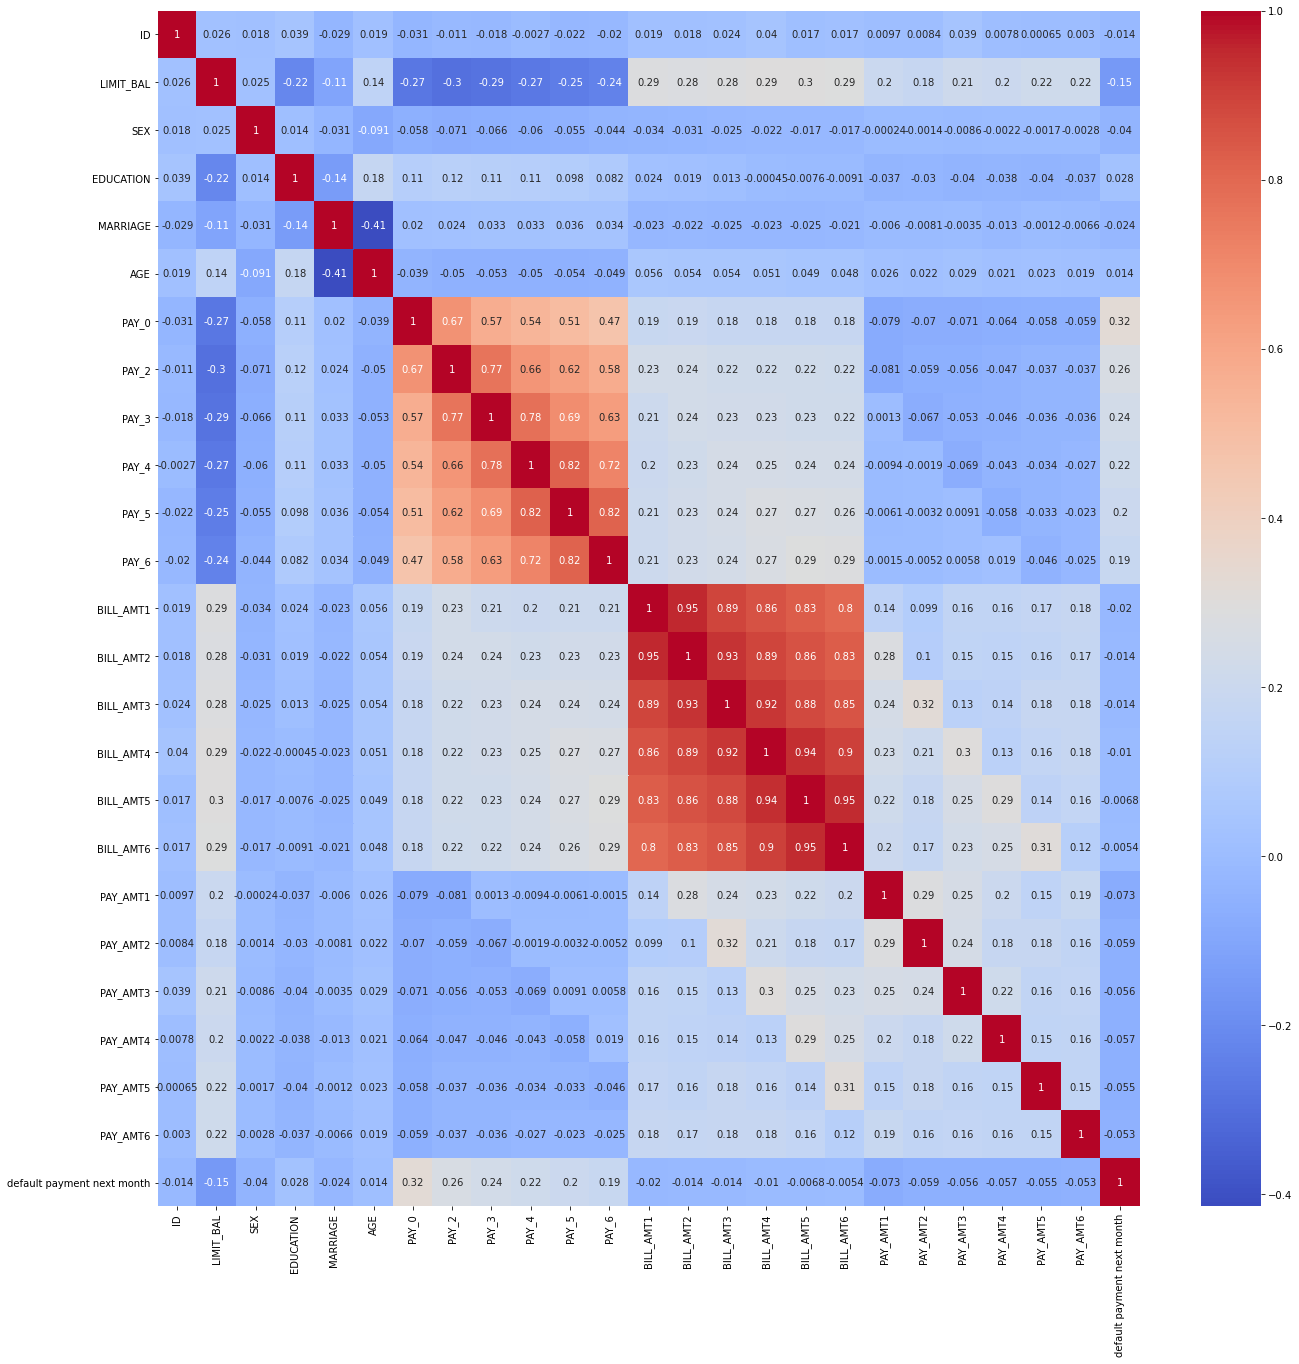

In [10]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

# To better help with the profilling of the credit card defaults, segmentation will be done

In [11]:
df['AGE'].max()

79

In [12]:
df['AGE'].min()

21

In [13]:
bin_edges = [20,25,30,35,40,45,50,55,60,65,70,79]
bin_names = ['below_25','below_30','below_35','below_40','below_45','below_50','below_55','below_60','below_65','below_70','below_75']
df['Age_levels'] = pd.cut(df['AGE'], bin_edges, labels=bin_names)

In [14]:
df['LIMIT_BAL'].max()

1000000

In [15]:
df['LIMIT_BAL'].min()

10000

In [16]:
bin_edges = [0,100000,200000,300000,400000,500000,600000,700000,800000]
bin_names = ['below_100k','below_200k','below_300k','below_400k','below_500k','below_600k','below_700k','below_800k']
df['Limit_Bal_Class'] = pd.cut(df['LIMIT_BAL'], bin_edges, labels=bin_names)

In [17]:
bill_pay = df.loc[:,['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
for i in bill_pay:
    print('The maximum value for', i,' is:',df[i].max(),'while the minimum value is:',df[i].min())

The maximum value for BILL_AMT1  is: 964511 while the minimum value is: -165580
The maximum value for BILL_AMT2  is: 983931 while the minimum value is: -69777
The maximum value for BILL_AMT3  is: 1664089 while the minimum value is: -157264
The maximum value for BILL_AMT4  is: 891586 while the minimum value is: -170000
The maximum value for BILL_AMT5  is: 927171 while the minimum value is: -81334
The maximum value for BILL_AMT6  is: 961664 while the minimum value is: -339603
The maximum value for PAY_AMT1  is: 873552 while the minimum value is: 0
The maximum value for PAY_AMT2  is: 1684259 while the minimum value is: 0
The maximum value for PAY_AMT3  is: 896040 while the minimum value is: 0
The maximum value for PAY_AMT4  is: 621000 while the minimum value is: 0
The maximum value for PAY_AMT5  is: 426529 while the minimum value is: 0
The maximum value for PAY_AMT6  is: 528666 while the minimum value is: 0


In [18]:
bin_edges = [-165580,0,100000,200000,300000,400000,500000,600000,700000,800000]
bin_names = ['below_0','below_100k','below_200k','below_300k','below_400k','below_500k','below_600k','below_700k','below_800k']

In [19]:
df['Bill_AMT1_Category'] = pd.cut(df['BILL_AMT1'], bin_edges, labels=bin_names)

In [20]:
bin_edges = [-69777,0,100000,200000,300000,400000,500000,600000,700000,800000]
bin_names = ['below_0','below_100k','below_200k','below_300k','below_400k','below_500k','below_600k','below_700k','below_800k']
df['Bill_AMT2_Category'] = pd.cut(df['BILL_AMT2'], bin_edges, labels=bin_names)

In [21]:
bin_edges = [-157264,0,100000,200000,300000,400000,500000,600000,700000,900000]
bin_names = ['below_0','below_100k','below_200k','below_300k','below_400k','below_500k','below_600k','below_700k','below_900k']
df['Bill_AMT3_Category'] = pd.cut(df['BILL_AMT3'], bin_edges, labels=bin_names)

In [22]:
bin_edges = [-170000,0,100000,200000,300000,400000,500000,600000,700000,800000]
bin_names = ['below_0','below_100k','below_200k','below_300k','below_400k','below_500k','below_600k','below_700k','below_800k']
df['Bill_AMT4_Category'] = pd.cut(df['BILL_AMT4'], bin_edges, labels=bin_names)

In [23]:
bin_edges = [-81334,0,100000,200000,300000,400000,500000,600000,900000]
bin_names = ['below_0','below_100k','below_200k','below_300k','below_400k','below_500k','below_600k','below_900k']
df['Bill_AMT5_Category'] = pd.cut(df['BILL_AMT5'], bin_edges, labels=bin_names)

In [24]:
bin_edges = [-339603,0,100000,200000,300000,400000,500000,600000,700000]
bin_names = ['below_0','below_100k','below_200k','below_300k','below_400k','below_500k','below_600k','below_700k']
df['Bill_AMT6_Category'] = pd.cut(df['BILL_AMT6'], bin_edges, labels=bin_names)

In [25]:
bin_edges = [-1,0,100000,200000,300000,400000,500000]
bin_names = ['zero_amount','below_100k','below_200k','below_300k','below_400k','above_400k']
df['Pay_AMT1_Category'] = pd.cut(df['PAY_AMT1'], bin_edges, labels=bin_names)

In [26]:
bin_edges = [-1,0,100000,200000,300000,400000,500000,600000,1100000]
bin_names = ['zero_amount','below_100k','below_200k','below_300k','below_400k','below_500k','below_600k','above_1.1M']
df['Pay_AMT2_Category'] = pd.cut(df['PAY_AMT2'], bin_edges, labels=bin_names)

In [27]:
bin_edges = [-1,0,100000,200000,300000,400000,500000]
bin_names = ['zero_amount','below_100k','below_200k','below_300k','below_400k','above_400k']
df['Pay_AMT3_Category'] = pd.cut(df['PAY_AMT3'], bin_edges, labels=bin_names)

In [28]:
bin_edges = [-1,0,100000,200000,300000,400000,500000]
bin_names = ['zero_amount','below_100k','below_200k','below_300k','below_400k','above_400k']
df['Pay_AMT4_Category'] = pd.cut(df['PAY_AMT4'], bin_edges, labels=bin_names)

In [29]:
bin_edges = [-1,0,100000,200000,300000,400000]
bin_names = ['zero_amount','below_100k','below_200k','below_300k','above_400k']
df['Pay_AMT5_Category'] = pd.cut(df['PAY_AMT5'], bin_edges, labels=bin_names)

In [30]:
bin_edges = [-1,0,100000,200000,300000,400000,500000]
bin_names = ['zero_amount','below_100k','below_200k','below_300k','below_400k','above_500k']
df['Pay_AMT6_Category'] = pd.cut(df['PAY_AMT6'], bin_edges, labels=bin_names)

In [31]:
df.dropna(inplace=True)

# Univariate Analysis

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


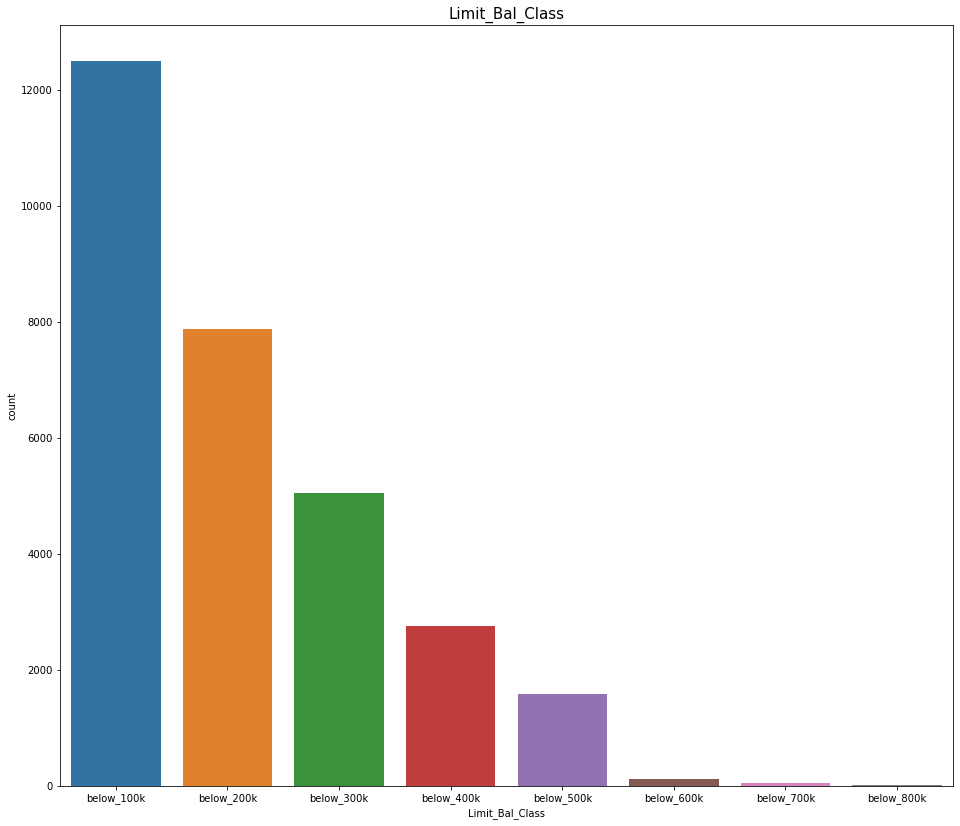

In [32]:
plt.figure(figsize=(16,14))
sns.countplot(df['Limit_Bal_Class'])
plt.title('Limit_Bal_Class', fontsize = 15)
plt.show()

In [33]:
pd.DataFrame(df['Limit_Bal_Class'].value_counts())

,Limit_Bal_Class
below_100k,12497
below_200k,7879
below_300k,5055
below_400k,2758
below_500k,1593
below_600k,126
below_700k,56
below_800k,20


In [34]:
pd.DataFrame(df['Limit_Bal_Class'].value_counts(normalize=True)*100)

,Limit_Bal_Class
below_100k,41.678895
below_200k,26.277348
below_300k,16.858991
below_400k,9.198239
below_500k,5.312834
below_600k,0.420224
below_700k,0.186766
below_800k,0.066702


In [35]:
#From the analytics, majority of our credit card users had a limit balance of below_200K
#in their account which accounts for 67.94%

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


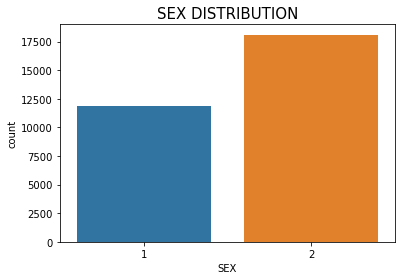

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(df['SEX'])
plt.title('SEX DISTRIBUTION', fontsize = 15)
plt.show()

In [37]:
pd.DataFrame(df['SEX'].value_counts())

,SEX
2,18103
1,11881


In [38]:
pd.DataFrame(df['SEX'].value_counts(normalize=True)*100)

,SEX
2,60.375534
1,39.624466


In [39]:
#60.37% of our credit users were females

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


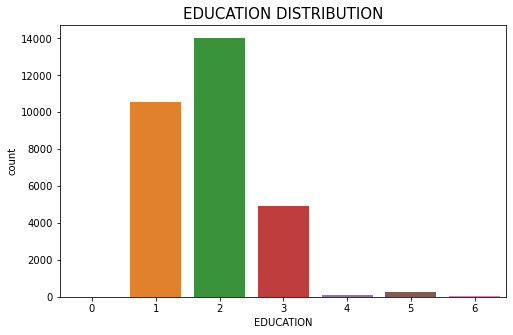

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(df['EDUCATION'])
plt.title('EDUCATION DISTRIBUTION', fontsize = 15)
plt.show()

In [41]:
pd.DataFrame(df['EDUCATION'].value_counts())

,EDUCATION
2,14026
1,10574
3,4916
5,280
4,123
6,51
0,14


In [42]:
pd.DataFrame(df['EDUCATION'].value_counts(normalize=True)*100)

,EDUCATION
2,46.778282
1,35.265475
3,16.395411
5,0.933831
4,0.410219
6,0.170091
0,0.046692


In [43]:
#82.05% of our customers had attained educational level of 1 and 2 that is graduate school and university respectively,
#while 16.40 had high school as their educational level

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


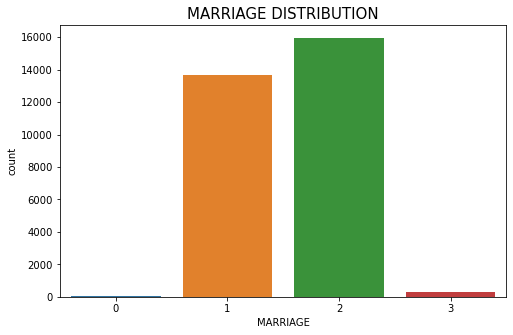

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(df['MARRIAGE'])
plt.title('MARRIAGE DISTRIBUTION', fontsize = 15)
plt.show()

In [45]:
pd.DataFrame(df['MARRIAGE'].value_counts())

,MARRIAGE
2,15957
1,13651
3,322
0,54


In [46]:
pd.DataFrame(df['MARRIAGE'].value_counts(normalize=True)*100)

,MARRIAGE
2,53.218383
1,45.527615
3,1.073906
0,0.180096


In [47]:
#From our dataset 53.22% of our credit users had a marriage value of 2 which is single 
#while 45.53% had marriage value of 1 which is married

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


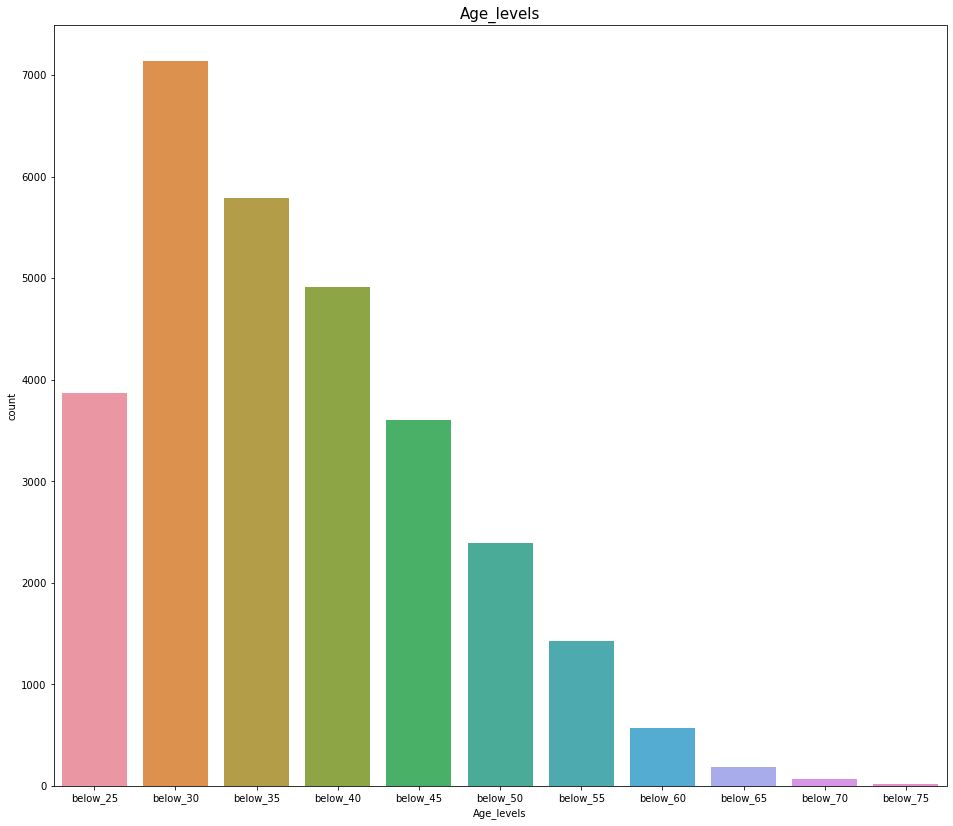

In [48]:
plt.figure(figsize=(16,14))
sns.countplot(df['Age_levels'])
plt.title('Age_levels', fontsize = 15)
plt.show()

In [49]:
pd.DataFrame(df['Age_levels'].value_counts())

,Age_levels
below_30,7137
below_35,5793
below_40,4914
below_25,3871
below_45,3603
below_50,2397
below_55,1425
below_60,572
below_65,186
below_70,71


In [50]:
pd.DataFrame(df['Age_levels'].value_counts(normalize=True)*100)

,Age_levels
below_30,23.802695
below_35,19.320304
below_40,16.388741
below_25,12.910219
below_45,12.016409
below_50,7.994264
below_55,4.752535
below_60,1.907684
below_65,0.620331
below_70,0.236793


In [51]:
#The age range of our customers is from 21-79,both ends been the minimum and maximum ages, 
#while 72.42% of our customers were aged between 21 and 40 years

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


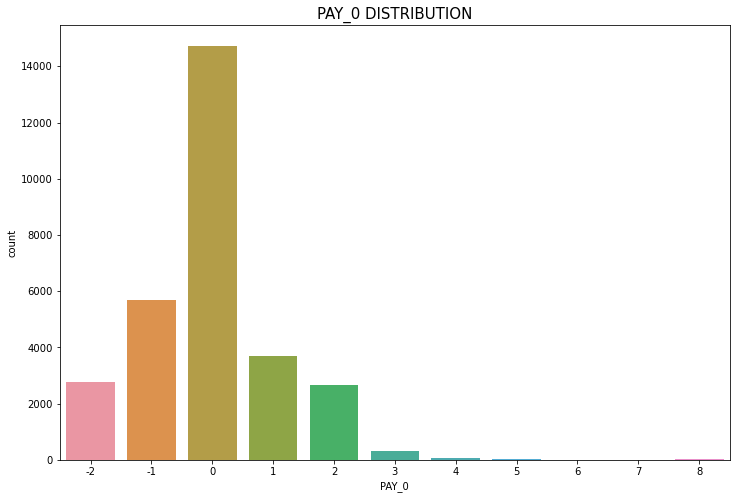

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(df['PAY_0'])
plt.title('PAY_0 DISTRIBUTION', fontsize = 15)
plt.show()

In [53]:
pd.DataFrame(df['PAY_0'].value_counts())

,PAY_0
0,14731
-1,5681
1,3685
-2,2758
2,2666
3,322
4,76
5,26
8,19
6,11


In [54]:
pd.DataFrame(df['PAY_0'].value_counts(normalize=True)*100)

,PAY_0
0,49.129536
-1,18.946772
1,12.289888
-2,9.198239
2,8.891409
3,1.073906
4,0.253469
5,0.086713
8,0.063367
6,0.036686


In [55]:
#80.37% of our customers had a pay_0 value range of -1,0 and 1 with value 0 having 49.13% 
#as the highest for the pay_0 feature.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


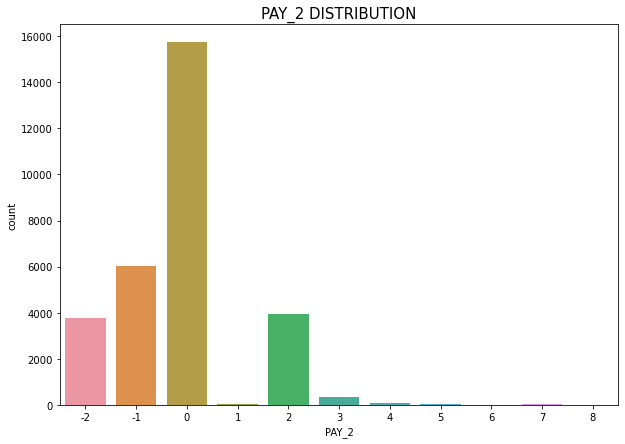

In [56]:
plt.figure(figsize=(10,7))
sns.countplot(df['PAY_2'])
plt.title('PAY_2 DISTRIBUTION', fontsize = 15)
plt.show()

In [57]:
pd.DataFrame(df['PAY_2'].value_counts())

,PAY_2
0,15723
-1,6043
2,3927
-2,3780
3,326
4,99
1,28
5,25
7,20
6,12


In [58]:
pd.DataFrame(df['PAY_2'].value_counts(normalize=True)*100)

,PAY_2
0,52.437967
-1,20.154082
2,13.096985
-2,12.606724
3,1.087247
4,0.330176
1,0.093383
5,0.083378
7,0.066702
6,0.040021


In [59]:
#PAY_2 values of 0 and -1 accounts for 72.60% of our customers profile, with Value 0 been the highest with 52.44%

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


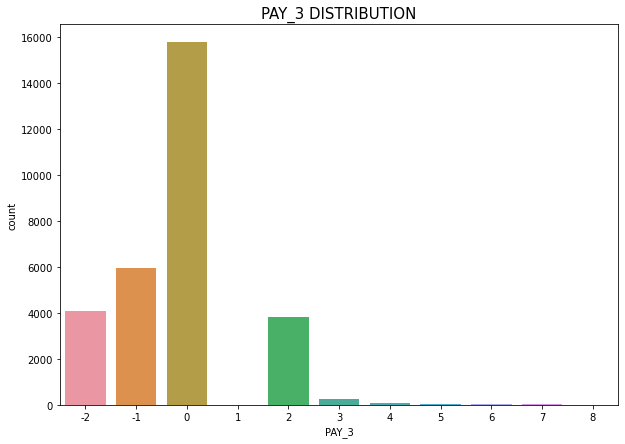

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(df['PAY_3'])
plt.title('PAY_3 DISTRIBUTION', fontsize = 15)
plt.show()

In [61]:
pd.DataFrame(df['PAY_3'].value_counts())

,PAY_3
0,15757
-1,5931
-2,4084
2,3818
3,240
4,76
7,27
6,23
5,21
1,4


In [62]:
pd.DataFrame(df['PAY_3'].value_counts(normalize=True)*100)

,PAY_3
0,52.551361
-1,19.780550
-2,13.620598
2,12.733458
3,0.800427
4,0.253469
7,0.090048
6,0.076708
5,0.070037
1,0.013340


In [63]:
#PAY_3 values of 0 and -1 accounts 72.33% of the our customers profile

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


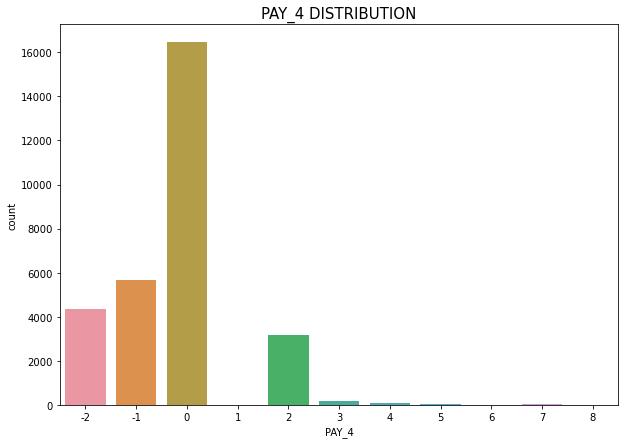

In [64]:
plt.figure(figsize=(10,7))
sns.countplot(df['PAY_4'])
plt.title('PAY_4 DISTRIBUTION', fontsize = 15)
plt.show()

In [65]:
pd.DataFrame(df['PAY_4'].value_counts())

,PAY_4
0,16447
-1,5680
-2,4347
2,3159
3,180
4,69
7,58
5,35
6,5
1,2


In [66]:
pd.DataFrame(df['PAY_4'].value_counts(normalize=True)*100)

,PAY_4
0,54.852588
-1,18.943436
-2,14.497732
2,10.535619
3,0.600320
4,0.230123
7,0.193436
5,0.116729
6,0.016676
1,0.006670


In [67]:
#73.80% accounts for PAY_4 value of 0 and -1

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


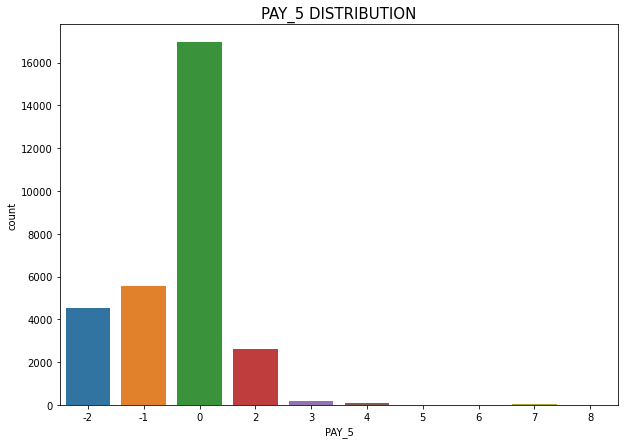

In [68]:
plt.figure(figsize=(10,7))
sns.countplot(df['PAY_5'])
plt.title('PAY_5 DISTRIBUTION', fontsize = 15)
plt.show()

In [69]:
pd.DataFrame(df['PAY_5'].value_counts())

,PAY_5
0,16938
-1,5534
-2,4544
2,2626
3,178
4,84
7,58
5,17
6,4
8,1


In [70]:
pd.DataFrame(df['PAY_5'].value_counts(normalize=True)*100)

,PAY_5
0,56.490128
-1,18.456510
-2,15.154749
2,8.758004
3,0.593650
4,0.280149
7,0.193436
5,0.056697
6,0.013340
8,0.003335


In [71]:
#74.95% of our customers had a PAY_5 values of 0 and -1 while value 8 was the least recorded

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


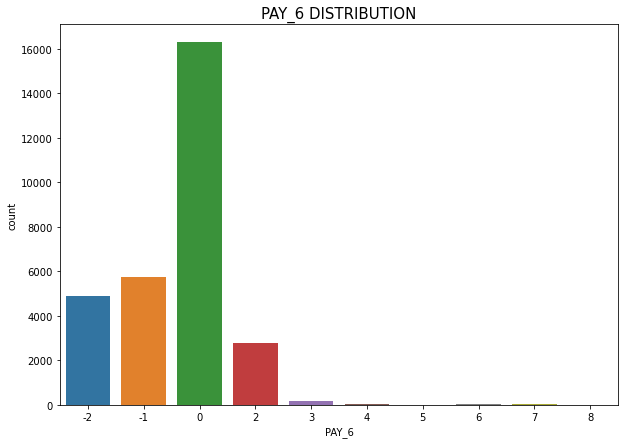

In [72]:
plt.figure(figsize=(10,7))
sns.countplot(df['PAY_6'])
plt.title('PAY_6 DISTRIBUTION', fontsize = 15)
plt.show()

In [73]:
pd.DataFrame(df['PAY_6'].value_counts())

,PAY_6
0,16278
-1,5733
-2,4894
2,2766
3,184
4,49
7,46
6,19
5,13
8,2


In [74]:
pd.DataFrame(df['PAY_6'].value_counts(normalize=True)*100)

,PAY_6
0,54.288954
-1,19.120197
-2,16.322038
2,9.224920
3,0.613661
4,0.163420
7,0.153415
6,0.063367
5,0.043356
8,0.006670


In [75]:
#73.41% had a PAY_6 values of 0 and -1

In [76]:
print(df['BILL_AMT1'].min(), df['BILL_AMT1'].max())

-154973 746814


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


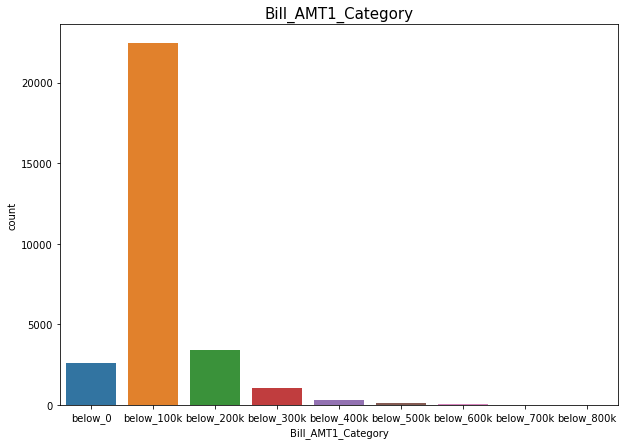

In [77]:
plt.figure(figsize=(10,7))
sns.countplot(df['Bill_AMT1_Category'])
plt.title('Bill_AMT1_Category', fontsize = 15)
plt.show()

In [78]:
pd.DataFrame(df['Bill_AMT1_Category'].value_counts())

,Bill_AMT1_Category
below_100k,22487
below_200k,3381
below_0,2596
below_300k,1032
below_400k,315
below_500k,130
below_600k,34
below_700k,8
below_800k,1


In [79]:
pd.DataFrame(df['Bill_AMT1_Category'].value_counts(normalize=True)*100)

,Bill_AMT1_Category
below_100k,74.996665
below_200k,11.276014
below_0,8.657951
below_300k,3.441836
below_400k,1.050560
below_500k,0.433565
below_600k,0.113394
below_700k,0.026681
below_800k,0.003335


In [80]:
#75% of our customers had between 0 and 100000 as their bill amount_1 followed by those with above 100000 to 200000 with 11.27%
#while those with below zero that is having negative as their bill amount_1 accounts for 8.66% of our customers

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


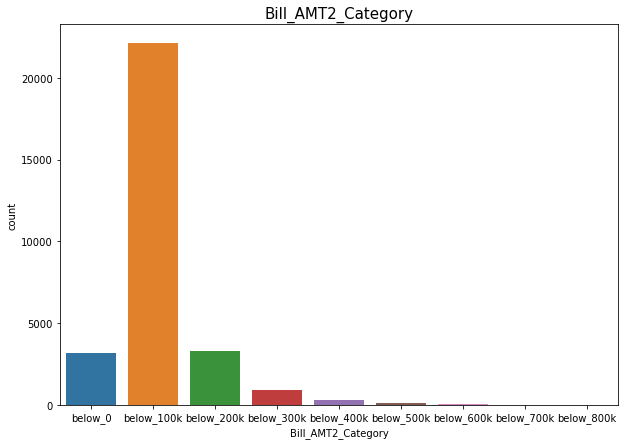

In [81]:
plt.figure(figsize=(10,7))
sns.countplot(df['Bill_AMT2_Category'])
plt.title('Bill_AMT2_Category', fontsize = 15)
plt.show()

In [82]:
pd.DataFrame(df['Bill_AMT2_Category'].value_counts())

,Bill_AMT2_Category
below_100k,22154
below_200k,3271
below_0,3172
below_300k,945
below_400k,297
below_500k,109
below_600k,31
below_700k,4
below_800k,1


In [83]:
pd.DataFrame(df['Bill_AMT2_Category'].value_counts(normalize=True)*100)

,Bill_AMT2_Category
below_100k,73.886073
below_200k,10.909152
below_0,10.578975
below_300k,3.151681
below_400k,0.990528
below_500k,0.363527
below_600k,0.103388
below_700k,0.013340
below_800k,0.003335


In [84]:
#73.88% of our customers had between 0 and 100000 as their bill amount_2 followed by those with above 100000 to 200000 with 10.91%
#while those with below zero as their bill amount_2 accounts for 10.58% of our customers

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


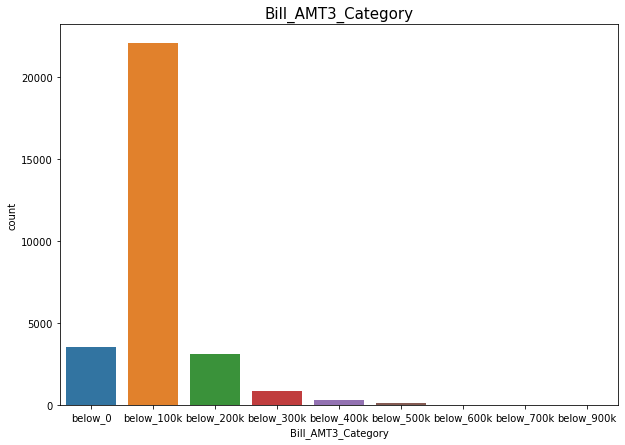

In [85]:
plt.figure(figsize=(10,7))
sns.countplot(df['Bill_AMT3_Category'])
plt.title('Bill_AMT3_Category', fontsize = 15)
plt.show()

In [86]:
pd.DataFrame(df['Bill_AMT3_Category'].value_counts())

,Bill_AMT3_Category
below_100k,22091
below_0,3523
below_200k,3121
below_300k,850
below_400k,274
below_500k,105
below_600k,15
below_700k,4
below_900k,1


In [87]:
pd.DataFrame(df['Bill_AMT3_Category'].value_counts(normalize=True)*100)

,Bill_AMT3_Category
below_100k,73.675961
below_0,11.749600
below_200k,10.408885
below_300k,2.834845
below_400k,0.913821
below_500k,0.350187
below_600k,0.050027
below_700k,0.013340
below_900k,0.003335


In [88]:
#Customers with bill amount_3 of below 100000 and 0 accounts for 85.42% of our customers

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


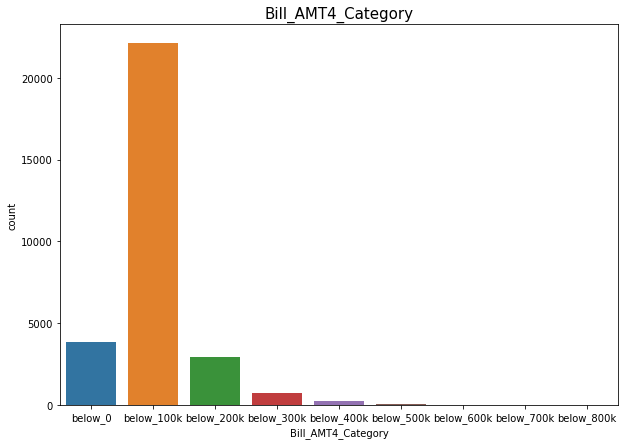

In [89]:
plt.figure(figsize=(10,7))
sns.countplot(df['Bill_AMT4_Category'])
plt.title('Bill_AMT4_Category', fontsize = 15)
plt.show()

In [90]:
pd.DataFrame(df['Bill_AMT4_Category'].value_counts())

,Bill_AMT4_Category
below_100k,22159
below_0,3868
below_200k,2938
below_300k,706
below_400k,222
below_500k,73
below_600k,15
below_700k,2
below_800k,1


In [91]:
pd.DataFrame(df['Bill_AMT4_Category'].value_counts(normalize=True)*100)

,Bill_AMT4_Category
below_100k,73.902748
below_0,12.900213
below_200k,9.798559
below_300k,2.354589
below_400k,0.740395
below_500k,0.243463
below_600k,0.050027
below_700k,0.006670
below_800k,0.003335


In [92]:
#Customers with bill amount_4 of below 100000 and 0 accounts for 86.8% of our customers

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


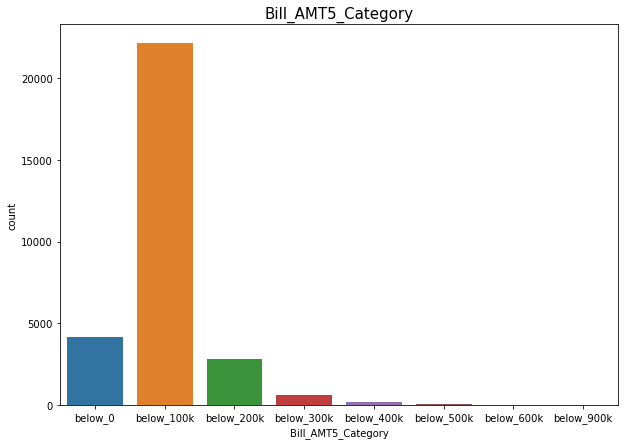

In [93]:
plt.figure(figsize=(10,7))
sns.countplot(df['Bill_AMT5_Category'])
plt.title('Bill_AMT5_Category', fontsize = 15)
plt.show()

In [94]:
pd.DataFrame(df['Bill_AMT5_Category'].value_counts())

,Bill_AMT5_Category
below_100k,22171
below_0,4159
below_200k,2784
below_300k,622
below_400k,182
below_500k,55
below_600k,10
below_900k,1


In [95]:
pd.DataFrame(df['Bill_AMT5_Category'].value_counts(normalize=True)*100)

,Bill_AMT5_Category
below_100k,73.942769
below_0,13.870731
below_200k,9.284952
below_300k,2.074440
below_400k,0.606990
below_500k,0.183431
below_600k,0.033351
below_900k,0.003335


In [96]:
#bill amount_5 of below 100000 has accounted for 73.94% of the total customers using our credit facility

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


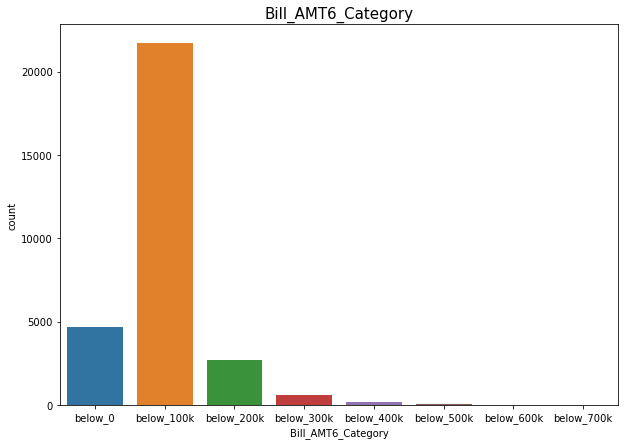

In [97]:
plt.figure(figsize=(10,7))
sns.countplot(df['Bill_AMT6_Category'])
plt.title('Bill_AMT6_Category', fontsize = 15)
plt.show()

In [98]:
pd.DataFrame(df['Bill_AMT6_Category'].value_counts())

,Bill_AMT6_Category
below_100k,21745
below_0,4706
below_200k,2719
below_300k,592
below_400k,164
below_500k,50
below_600k,7
below_700k,1


In [99]:
pd.DataFrame(df['Bill_AMT6_Category'].value_counts(normalize=True)*100)

,Bill_AMT6_Category
below_100k,72.522012
below_0,15.695037
below_200k,9.068170
below_300k,1.974386
below_400k,0.546958
below_500k,0.166756
below_600k,0.023346
below_700k,0.003335


In [100]:
#Bill amount_6 with below 100000 accounts for 72.51% of our credit users

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


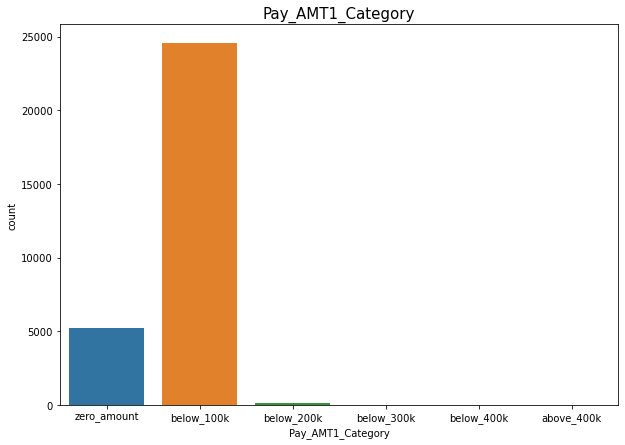

In [101]:
plt.figure(figsize=(10,7))
sns.countplot(df['Pay_AMT1_Category'])
plt.title('Pay_AMT1_Category', fontsize = 15)
plt.show()

In [102]:
pd.DataFrame(df['Pay_AMT1_Category'].value_counts())

,Pay_AMT1_Category
below_100k,24592
zero_amount,5247
below_200k,109
below_300k,29
below_400k,5
above_400k,2


In [103]:
pd.DataFrame(df['Pay_AMT1_Category'].value_counts(normalize=True)*100)

,Pay_AMT1_Category
below_100k,82.017076
zero_amount,17.499333
below_200k,0.363527
below_300k,0.096718
below_400k,0.016676
above_400k,0.006670


In [104]:
#PAY_AMT1 has 82.01% of below 100000 while customers with zero amount account for 17.5%

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


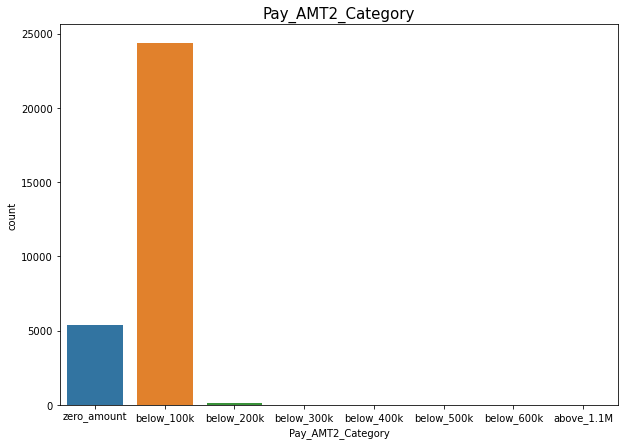

In [105]:
plt.figure(figsize=(10,7))
sns.countplot(df['Pay_AMT2_Category'])
plt.title('Pay_AMT2_Category', fontsize = 15)
plt.show()

In [106]:
pd.DataFrame(df['Pay_AMT2_Category'].value_counts())

,Pay_AMT2_Category
below_100k,24399
zero_amount,5395
below_200k,143
below_300k,30
below_400k,14
below_500k,1
below_600k,1
above_1.1M,1


In [107]:
pd.DataFrame(df['Pay_AMT2_Category'].value_counts(normalize=True)*100)

,Pay_AMT2_Category
below_100k,81.373399
zero_amount,17.992930
below_200k,0.476921
below_300k,0.100053
below_400k,0.046692
below_500k,0.003335
below_600k,0.003335
above_1.1M,0.003335


In [108]:
#below 100000 with 81.37% accounts for the majority of our credit customers

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


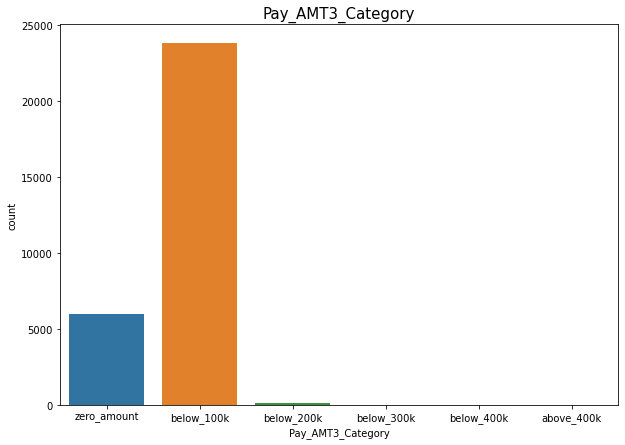

In [109]:
plt.figure(figsize=(10,7))
sns.countplot(df['Pay_AMT3_Category'])
plt.title('Pay_AMT3_Category', fontsize = 15)
plt.show()

In [110]:
pd.DataFrame(df['Pay_AMT3_Category'].value_counts())

,Pay_AMT3_Category
below_100k,23848
zero_amount,5966
below_200k,135
below_300k,22
below_400k,11
above_400k,2


In [111]:
pd.DataFrame(df['Pay_AMT3_Category'].value_counts(normalize=True)*100)

,Pay_AMT3_Category
below_100k,79.535752
zero_amount,19.897279
below_200k,0.450240
below_300k,0.073372
below_400k,0.036686
above_400k,0.006670


In [112]:
#PAY_AMT3 below_100k accounts for 79.53% of our credit users

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


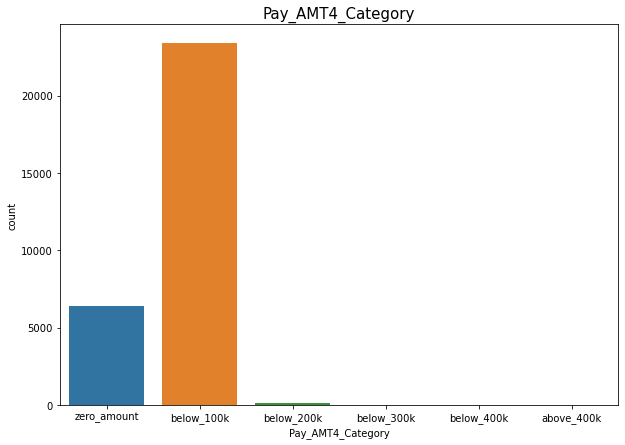

In [113]:
plt.figure(figsize=(10,7))
sns.countplot(df['Pay_AMT4_Category'])
plt.title('Pay_AMT4_Category', fontsize = 15)
plt.show()

In [114]:
pd.DataFrame(df['Pay_AMT4_Category'].value_counts())

,Pay_AMT4_Category
below_100k,23433
zero_amount,6407
below_200k,115
below_300k,23
below_400k,4
above_400k,2


In [115]:
pd.DataFrame(df['Pay_AMT4_Category'].value_counts(normalize=True)*100)

,Pay_AMT4_Category
below_100k,78.151681
zero_amount,21.368063
below_200k,0.383538
below_300k,0.076708
below_400k,0.013340
above_400k,0.006670


In [116]:
#78.15% of the credit users had below_100k of PAY_AMT4

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


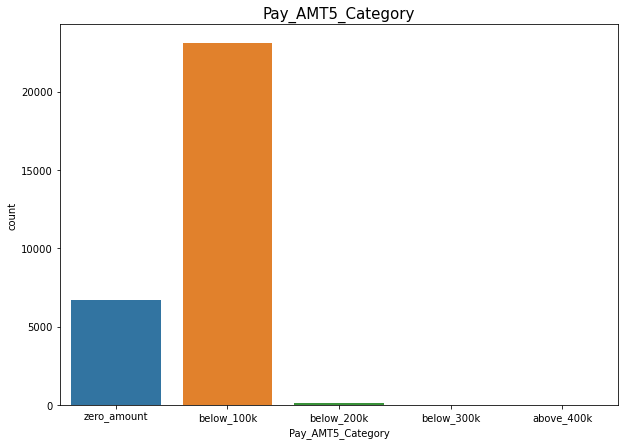

In [117]:
plt.figure(figsize=(10,7))
sns.countplot(df['Pay_AMT5_Category'])
plt.title('Pay_AMT5_Category', fontsize = 15)
plt.show()

In [118]:
pd.DataFrame(df['Pay_AMT5_Category'].value_counts())

,Pay_AMT5_Category
below_100k,23133
zero_amount,6701
below_200k,123
below_300k,19
above_400k,8


In [119]:
pd.DataFrame(df['Pay_AMT5_Category'].value_counts(normalize=True)*100)

,Pay_AMT5_Category
below_100k,77.151147
zero_amount,22.348586
below_200k,0.410219
below_300k,0.063367
above_400k,0.026681


In [120]:
#PAY_AMT5 below 100k accounts for 77.15% of our customers

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


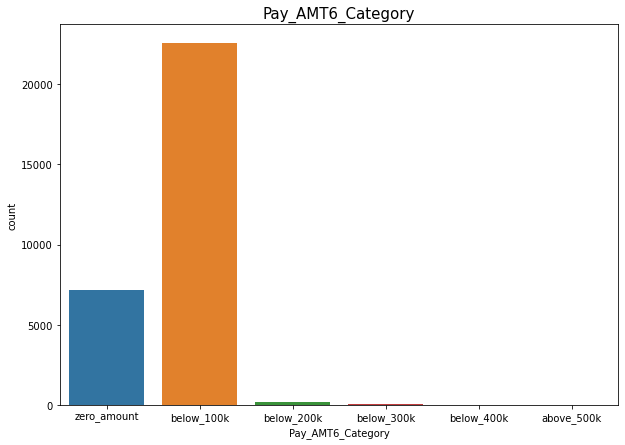

In [121]:
plt.figure(figsize=(10,7))
sns.countplot(df['Pay_AMT6_Category'])
plt.title('Pay_AMT6_Category', fontsize = 15)
plt.show()

In [122]:
pd.DataFrame(df['Pay_AMT6_Category'].value_counts())

,Pay_AMT6_Category
below_100k,22591
zero_amount,7172
below_200k,178
below_300k,36
below_400k,4
above_500k,3


In [123]:
pd.DataFrame(df['Pay_AMT6_Category'].value_counts(normalize=True)*100)

,Pay_AMT6_Category
below_100k,75.343517
zero_amount,23.919424
below_200k,0.593650
below_300k,0.120064
below_400k,0.013340
above_500k,0.010005


In [124]:
#The sum of below 100k and zero amount accounts for 99.27% of the entire customers

# Bivariate Analysis

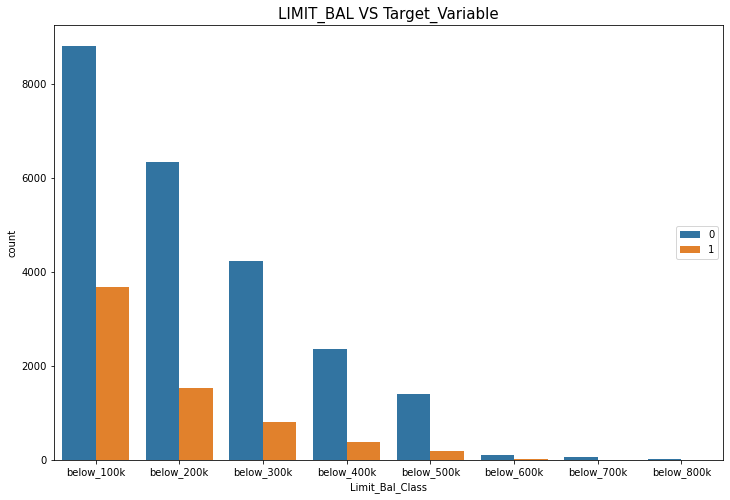

In [125]:
plt.figure(figsize=(12,8))
sns.countplot(x='Limit_Bal_Class', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('LIMIT_BAL VS Target_Variable', fontsize = 15)
plt.show()

In [126]:
pd.DataFrame(df.groupby('Limit_Bal_Class')['default payment next month'].value_counts())

default payment next month
Limit_Bal_Class default payment next month                            
below_100k      0                                                 8813
                1                                                 3684
below_200k      0                                                 6344
                1                                                 1535
below_300k      0                                                 4244
                1                                                  811
below_400k      0                                                 2370
                1                                                  388
below_500k      0                                                 1400
                1                                                  193
below_600k      0                                                  109
                1                                                   17
below_700k      0                                                   53
                1                                                    3
below_800k      0                                                   17
                1                                                    3

In [127]:
pd.DataFrame(df.groupby('Limit_Bal_Class')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Limit_Bal_Class default payment next month                            
below_100k      0                                            70.520925
                1                                            29.479075
below_200k      0                                            80.517832
                1                                            19.482168
below_300k      0                                            83.956479
                1                                            16.043521
below_400k      0                                            85.931835
                1                                            14.068165
below_500k      0                                            87.884495
                1                                            12.115505
below_600k      0                                            86.507937
                1                                            13.492063
below_700k      0                                            94.642857
                1                                             5.357143
below_800k      0                                            85.000000
                1                                            15.000000

In [128]:
#Credit card users with below_100k and below_200k limit balance accounts for 78.67% of defaults with below_100k been the most default with 3684 customers.
#As the limit balance increases the number of defaults decreases, indicating that the higher the limit balance the lower the probability of the customer defaulting.

In [130]:
df.groupby('default payment next month')['default payment next month'].count()

default payment next month
0    23350
1     6634
Name: default payment next month, dtype: int64

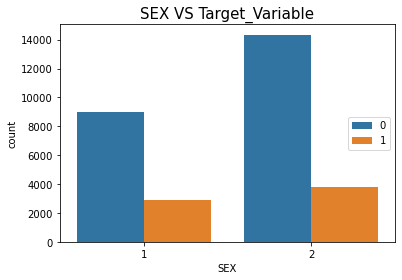

In [131]:
plt.figure(figsize=(6,4))
sns.countplot(x='SEX', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('SEX VS Target_Variable', fontsize = 15)
plt.show()

In [132]:
pd.DataFrame(df.groupby('SEX')['default payment next month'].value_counts())

default payment next month
SEX default payment next month                            
1   0                                                 9010
    1                                                 2871
2   0                                                14340
    1                                                 3763

In [133]:
pd.DataFrame(df.groupby('SEX')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
SEX default payment next month                            
1   0                                            75.835367
    1                                            24.164633
2   0                                            79.213390
    1                                            20.786610

In [134]:
#More default cases were recorded with the female gender with about 56.72% while male accounted for 43.28%

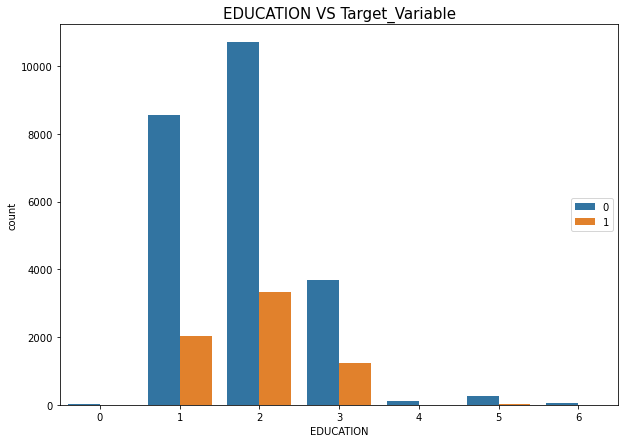

In [135]:
plt.figure(figsize=(10,7))
sns.countplot(x='EDUCATION', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('EDUCATION VS Target_Variable', fontsize = 15)
plt.show()

In [136]:
pd.DataFrame(df.groupby('EDUCATION')['default payment next month'].value_counts())

default payment next month
EDUCATION default payment next month                            
0         0                                                   14
1         0                                                 8540
          1                                                 2034
2         0                                                10696
          1                                                 3330
3         0                                                 3679
          1                                                 1237
4         0                                                  116
          1                                                    7
5         0                                                  262
          1                                                   18
6         0                                                   43
          1                                                    8

In [137]:
pd.DataFrame(df.groupby('EDUCATION')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
EDUCATION default payment next month                            
0         0                                           100.000000
1         0                                            80.764138
          1                                            19.235862
2         0                                            76.258377
          1                                            23.741623
3         0                                            74.837266
          1                                            25.162734
4         0                                            94.308943
          1                                             5.691057
5         0                                            93.571429
          1                                             6.428571
6         0                                            84.313725
          1                                            15.686275

In [138]:
#Education value of 2 which is university recorded more cases of default with 50.19% 
#followed by education 1 which is graduate school accounting for 30.66% 
#while education value 3 high school accounts for 18.65%

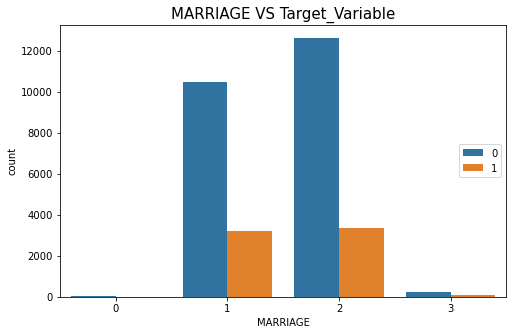

In [139]:
plt.figure(figsize=(8,5))
sns.countplot(x='MARRIAGE', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('MARRIAGE VS Target_Variable', fontsize = 15)
plt.show()

In [140]:
pd.DataFrame(df.groupby('MARRIAGE')['default payment next month'].value_counts())

default payment next month
MARRIAGE default payment next month                            
0        0                                                   49
         1                                                    5
1        0                                                10446
         1                                                 3205
2        0                                                12617
         1                                                 3340
3        0                                                  238
         1                                                   84

In [141]:
pd.DataFrame(df.groupby('MARRIAGE')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
MARRIAGE default payment next month                            
0        0                                            90.740741
         1                                             9.259259
1        0                                            76.521867
         1                                            23.478133
2        0                                            79.068747
         1                                            20.931253
3        0                                            73.913043
         1                                            26.086957

In [142]:
#Singles accounts for a higher number of defaults with 3340 cases recorded closely followed by married with 3205 cases

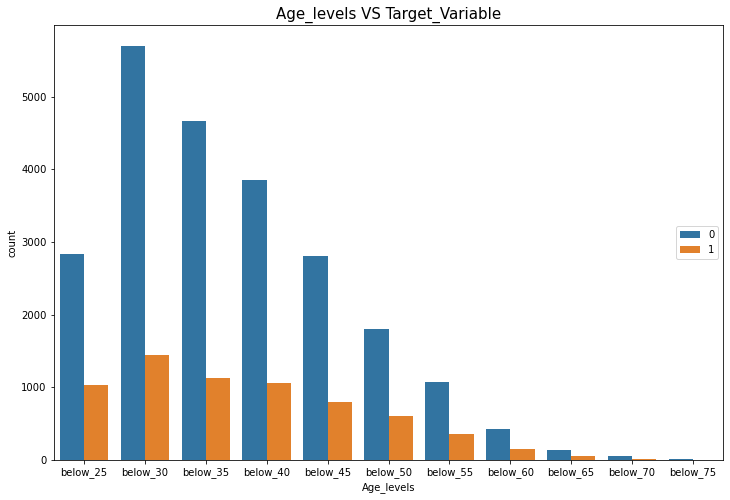

In [143]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age_levels', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Age_levels VS Target_Variable', fontsize = 15)
plt.show()

In [144]:
pd.DataFrame(df.groupby('Age_levels')['default payment next month'].value_counts())

default payment next month
Age_levels default payment next month                            
below_25   0                                                 2839
           1                                                 1032
below_30   0                                                 5698
           1                                                 1439
below_35   0                                                 4669
           1                                                 1124
below_40   0                                                 3851
           1                                                 1063
below_45   0                                                 2805
           1                                                  798
below_50   0                                                 1796
           1                                                  601
below_55   0                                                 1072
           1                                                  353
below_60   0                                                  421
           1                                                  151
below_65   0                                                  136
           1                                                   50
below_70   0                                                   53
           1                                                   18
below_75   0                                                   10
           1                                                    5

In [145]:
pd.DataFrame(df.groupby('Age_levels')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Age_levels default payment next month                            
below_25   0                                            73.340222
           1                                            26.659778
below_30   0                                            79.837467
           1                                            20.162533
below_35   0                                            80.597273
           1                                            19.402727
below_40   0                                            78.367928
           1                                            21.632072
below_45   0                                            77.851790
           1                                            22.148210
below_50   0                                            74.926992
           1                                            25.073008
below_55   0                                            75.228070
           1                                            24.771930
below_60   0                                            73.601399
           1                                            26.398601
below_65   0                                            73.118280
           1                                            26.881720
below_70   0                                            74.647887
           1                                            25.352113
below_75   0                                            66.666667
           1                                            33.333333

In [146]:
#More cases of default was recorded with customers between the ages of 21 and 45 
#with 4658 cases recorded accounting for 70.21%

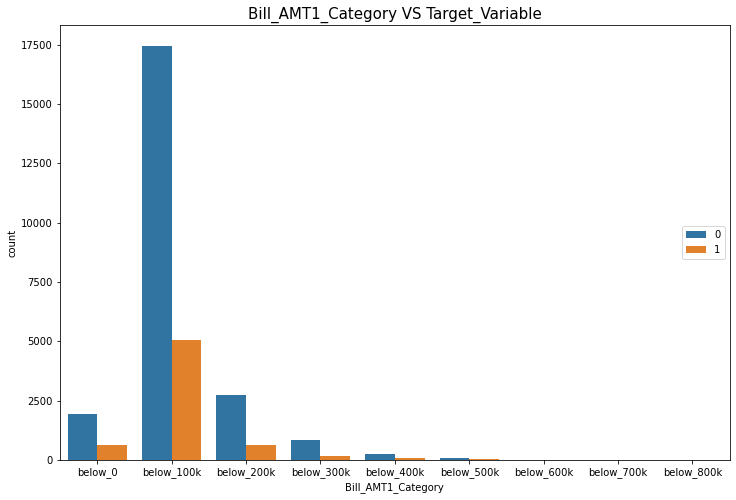

In [165]:
plt.figure(figsize=(12,8))
sns.countplot(x='Bill_AMT1_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Bill_AMT1_Category VS Target_Variable', fontsize = 15)
plt.show()

In [166]:
pd.DataFrame(df.groupby('Bill_AMT1_Category')['default payment next month'].value_counts())

default payment next month
Bill_AMT1_Category default payment next month                            
below_0            0                                                 1953
                   1                                                  643
below_100k         0                                                17452
                   1                                                 5035
below_200k         0                                                 2733
                   1                                                  648
below_300k         0                                                  843
                   1                                                  189
below_400k         0                                                  243
                   1                                                   72
below_500k         0                                                   99
                   1                                                   31
below_600k         0                                                   20
                   1                                                   14
below_700k         0                                                    6
                   1                                                    2
below_800k         0                                                    1

In [167]:
pd.DataFrame(df.groupby('Bill_AMT1_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Bill_AMT1_Category default payment next month                            
below_0            0                                            75.231125
                   1                                            24.768875
below_100k         0                                            77.609285
                   1                                            22.390715
below_200k         0                                            80.834073
                   1                                            19.165927
below_300k         0                                            81.686047
                   1                                            18.313953
below_400k         0                                            77.142857
                   1                                            22.857143
below_500k         0                                            76.153846
                   1                                            23.846154
below_600k         0                                            58.823529
                   1                                            41.176471
below_700k         0                                            75.000000
                   1                                            25.000000
below_800k         0                                           100.000000

In [168]:
#Customers with below_100k as bill amount statement for September recorded 5035 cases of default /
#out of the 6634 accounting for 75.90%
#As the bill amount statement increases the cases of defaults decreases

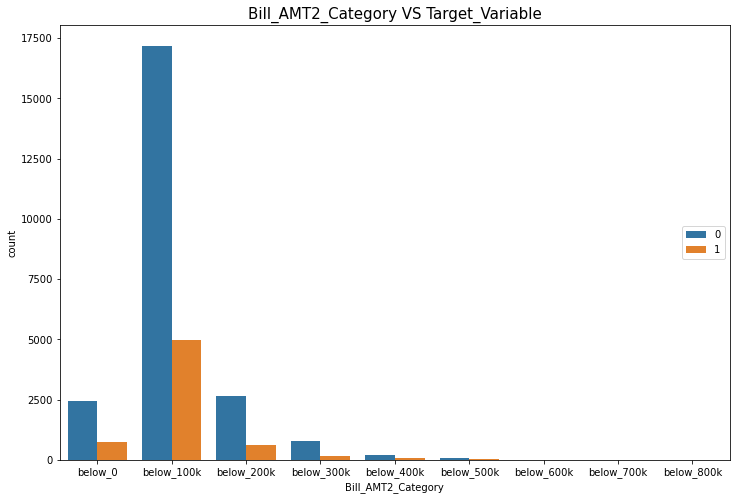

In [169]:
plt.figure(figsize=(12,8))
sns.countplot(x='Bill_AMT2_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Bill_AMT2_Category VS Target_Variable', fontsize = 15)
plt.show()

In [170]:
pd.DataFrame(df.groupby('Bill_AMT2_Category')['default payment next month'].value_counts())

default payment next month
Bill_AMT2_Category default payment next month                            
below_0            0                                                 2428
                   1                                                  744
below_100k         0                                                17185
                   1                                                 4969
below_200k         0                                                 2641
                   1                                                  630
below_300k         0                                                  768
                   1                                                  177
below_400k         0                                                  224
                   1                                                   73
below_500k         0                                                   82
                   1                                                   27
below_600k         0                                                   17
                   1                                                   14
below_700k         0                                                    4
below_800k         0                                                    1

In [171]:
pd.DataFrame(df.groupby('Bill_AMT2_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Bill_AMT2_Category default payment next month                            
below_0            0                                            76.544767
                   1                                            23.455233
below_100k         0                                            77.570642
                   1                                            22.429358
below_200k         0                                            80.739835
                   1                                            19.260165
below_300k         0                                            81.269841
                   1                                            18.730159
below_400k         0                                            75.420875
                   1                                            24.579125
below_500k         0                                            75.229358
                   1                                            24.770642
below_600k         0                                            54.838710
                   1                                            45.161290
below_700k         0                                           100.000000
below_800k         0                                           100.000000

In [172]:
#Customers with below_100k as bill amount statement for August recorded 4969 cases of default /
#out of the 6634 accounting for 74.90%
#As the bill amount statement increases the cases of defaults decreases

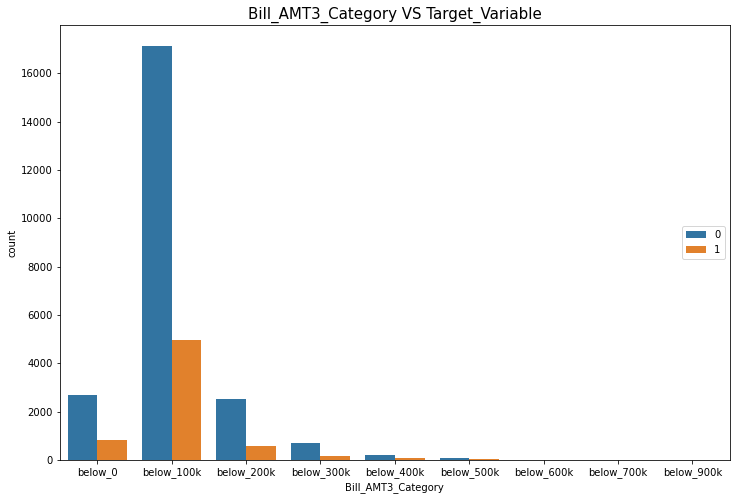

In [173]:
plt.figure(figsize=(12,8))
sns.countplot(x='Bill_AMT3_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Bill_AMT3_Category VS Target_Variable', fontsize = 15)
plt.show()

In [174]:
pd.DataFrame(df.groupby('Bill_AMT3_Category')['default payment next month'].value_counts())

default payment next month
Bill_AMT3_Category default payment next month                            
below_0            0                                                 2704
                   1                                                  819
below_100k         0                                                17140
                   1                                                 4951
below_200k         0                                                 2522
                   1                                                  599
below_300k         0                                                  687
                   1                                                  163
below_400k         0                                                  204
                   1                                                   70
below_500k         0                                                   80
                   1                                                   25
below_600k         0                                                    8
                   1                                                    7
below_700k         0                                                    4
below_900k         0                                                    1

In [175]:
pd.DataFrame(df.groupby('Bill_AMT3_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Bill_AMT3_Category default payment next month                            
below_0            0                                            76.752768
                   1                                            23.247232
below_100k         0                                            77.588158
                   1                                            22.411842
below_200k         0                                            80.807434
                   1                                            19.192566
below_300k         0                                            80.823529
                   1                                            19.176471
below_400k         0                                            74.452555
                   1                                            25.547445
below_500k         0                                            76.190476
                   1                                            23.809524
below_600k         0                                            53.333333
                   1                                            46.666667
below_700k         0                                           100.000000
below_900k         0                                           100.000000

In [176]:
#Customers with below_100k as bill amount statement for July recorded 4951 cases of default /
#out of the 6634 accounting for 74.63%
#As the bill amount statement for July increases the cases of defaults decreases

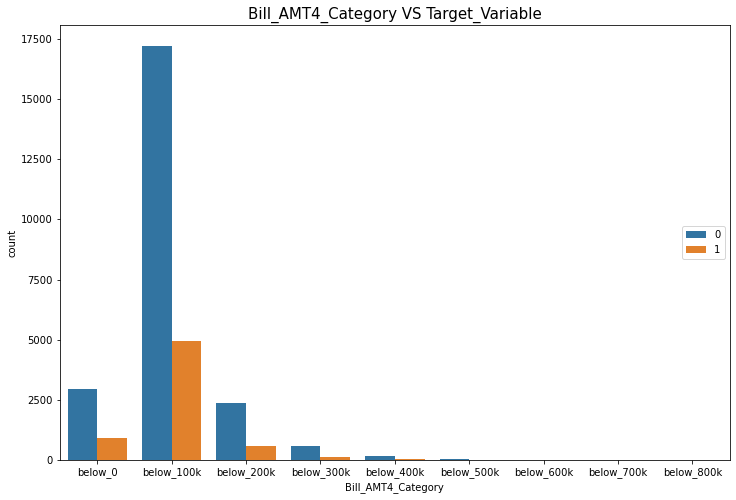

In [177]:
plt.figure(figsize=(12,8))
sns.countplot(x='Bill_AMT4_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Bill_AMT4_Category VS Target_Variable', fontsize = 15)
plt.show()

In [178]:
pd.DataFrame(df.groupby('Bill_AMT4_Category')['default payment next month'].value_counts())

default payment next month
Bill_AMT4_Category default payment next month                            
below_0            0                                                 2969
                   1                                                  899
below_100k         0                                                17212
                   1                                                 4947
below_200k         0                                                 2374
                   1                                                  564
below_300k         0                                                  563
                   1                                                  143
below_400k         0                                                  165
                   1                                                   57
below_500k         0                                                   56
                   1                                                   17
below_600k         0                                                    8
                   1                                                    7
below_700k         0                                                    2
below_800k         0                                                    1

In [179]:
pd.DataFrame(df.groupby('Bill_AMT4_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Bill_AMT4_Category default payment next month                            
below_0            0                                            76.758014
                   1                                            23.241986
below_100k         0                                            77.674985
                   1                                            22.325015
below_200k         0                                            80.803268
                   1                                            19.196732
below_300k         0                                            79.745042
                   1                                            20.254958
below_400k         0                                            74.324324
                   1                                            25.675676
below_500k         0                                            76.712329
                   1                                            23.287671
below_600k         0                                            53.333333
                   1                                            46.666667
below_700k         0                                           100.000000
below_800k         0                                           100.000000

In [180]:
#Customers with below_100k as bill amount statement for June recorded 4947 cases of default /
#out of the 6634 accounting for 74.57%
#As the bill amount statement for June increases the cases of defaults decreases

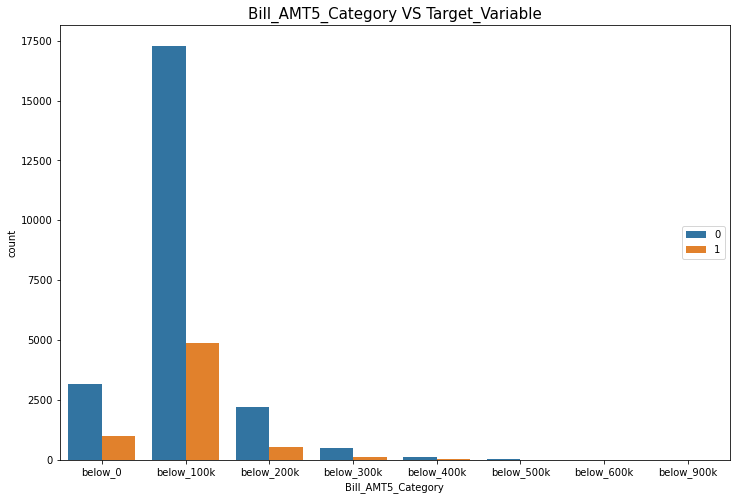

In [181]:
plt.figure(figsize=(12,8))
sns.countplot(x='Bill_AMT5_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Bill_AMT5_Category VS Target_Variable', fontsize = 15)
plt.show()

In [182]:
pd.DataFrame(df.groupby('Bill_AMT5_Category')['default payment next month'].value_counts())

default payment next month
Bill_AMT5_Category default payment next month                            
below_0            0                                                 3164
                   1                                                  995
below_100k         0                                                17282
                   1                                                 4889
below_200k         0                                                 2230
                   1                                                  554
below_300k         0                                                  492
                   1                                                  130
below_400k         0                                                  136
                   1                                                   46
below_500k         0                                                   39
                   1                                                   16
below_600k         0                                                    6
                   1                                                    4
below_900k         0                                                    1

In [183]:
pd.DataFrame(df.groupby('Bill_AMT5_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Bill_AMT5_Category default payment next month                            
below_0            0                                            76.075980
                   1                                            23.924020
below_100k         0                                            77.948672
                   1                                            22.051328
below_200k         0                                            80.100575
                   1                                            19.899425
below_300k         0                                            79.099678
                   1                                            20.900322
below_400k         0                                            74.725275
                   1                                            25.274725
below_500k         0                                            70.909091
                   1                                            29.090909
below_600k         0                                            60.000000
                   1                                            40.000000
below_900k         0                                           100.000000

In [184]:
#Customers with below_100k as bill amount statement for May recorded 4889 cases of default /
#out of the 6634 accounting for 73.70%
#As the bill amount statement for May increases the cases of defaults decreases

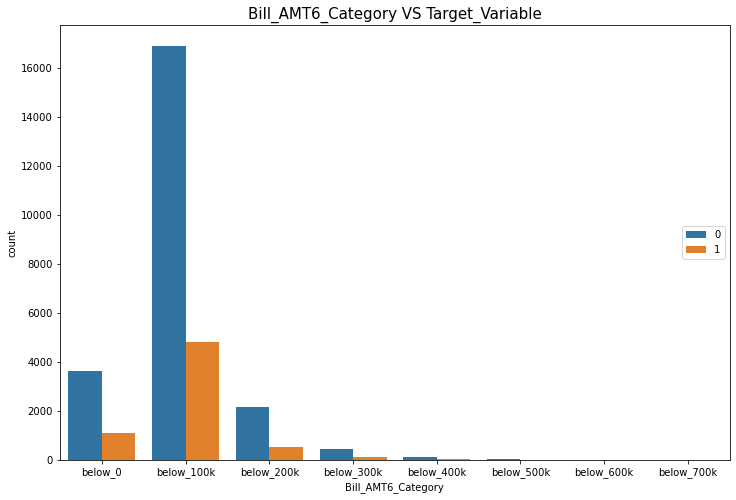

In [185]:
plt.figure(figsize=(12,8))
sns.countplot(x='Bill_AMT6_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Bill_AMT6_Category VS Target_Variable', fontsize = 15)
plt.show()

In [186]:
pd.DataFrame(df.groupby('Bill_AMT6_Category')['default payment next month'].value_counts())

default payment next month
Bill_AMT6_Category default payment next month                            
below_0            0                                                 3621
                   1                                                 1085
below_100k         0                                                16920
                   1                                                 4825
below_200k         0                                                 2179
                   1                                                  540
below_300k         0                                                  465
                   1                                                  127
below_400k         0                                                  124
                   1                                                   40
below_500k         0                                                   34
                   1                                                   16
below_600k         0                                                    6
                   1                                                    1
below_700k         0                                                    1

In [187]:
pd.DataFrame(df.groupby('Bill_AMT6_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Bill_AMT6_Category default payment next month                            
below_0            0                                            76.944326
                   1                                            23.055674
below_100k         0                                            77.810991
                   1                                            22.189009
below_200k         0                                            80.139757
                   1                                            19.860243
below_300k         0                                            78.547297
                   1                                            21.452703
below_400k         0                                            75.609756
                   1                                            24.390244
below_500k         0                                            68.000000
                   1                                            32.000000
below_600k         0                                            85.714286
                   1                                            14.285714
below_700k         0                                           100.000000

In [188]:
#Customers with below_100k as bill amount statement for April recorded 4825 cases of default /
#out of the 6634 accounting for 72.73%
#As the bill amount statement for April increases the cases of defaults decreases

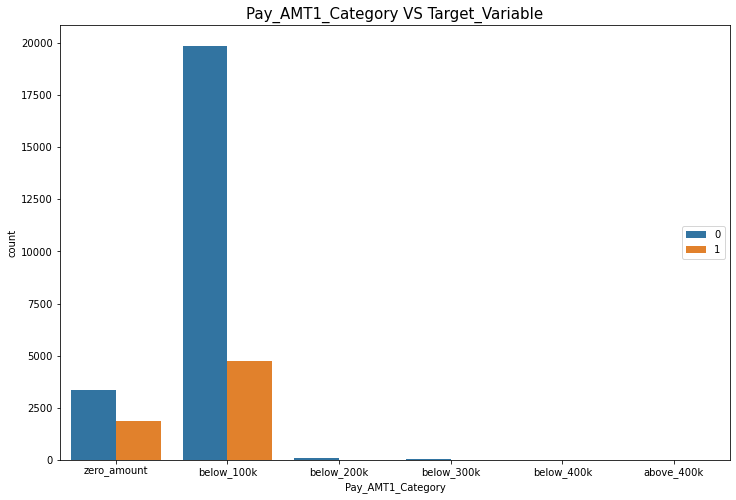

In [189]:
plt.figure(figsize=(12,8))
sns.countplot(x='Pay_AMT1_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Pay_AMT1_Category VS Target_Variable', fontsize = 15)
plt.show()

In [190]:
pd.DataFrame(df.groupby('Pay_AMT1_Category')['default payment next month'].value_counts(ascending=False))

default payment next month
Pay_AMT1_Category default payment next month                            
zero_amount       0                                                 3360
                  1                                                 1887
below_100k        0                                                19858
                  1                                                 4734
below_200k        0                                                   99
                  1                                                   10
below_300k        0                                                   26
                  1                                                    3
below_400k        0                                                    5
above_400k        0                                                    2

In [191]:
pd.DataFrame(df.groupby('Pay_AMT1_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Pay_AMT1_Category default payment next month                            
zero_amount       0                                            64.036592
                  1                                            35.963408
below_100k        0                                            80.749837
                  1                                            19.250163
below_200k        0                                            90.825688
                  1                                             9.174312
below_300k        0                                            89.655172
                  1                                            10.344828
below_400k        0                                           100.000000
above_400k        0                                           100.000000

In [ ]:
#Amount of previous payment in September with below_100k recorded more defaults in credit with 4734 cases 
#followed by no payment in the previous month with 1887 cases

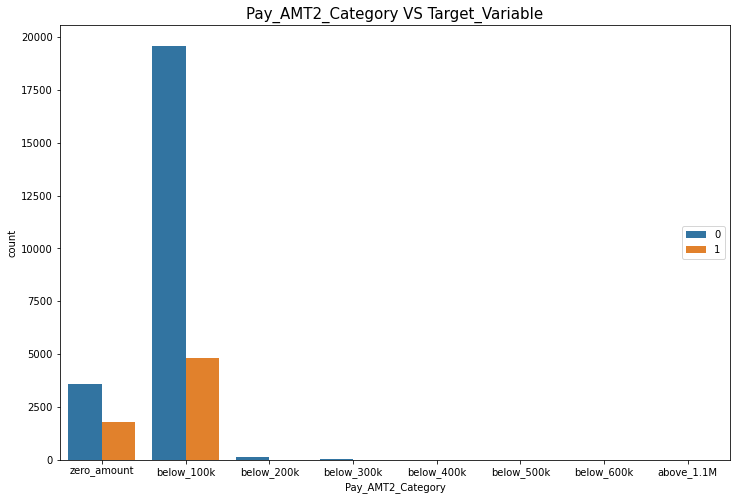

In [192]:
plt.figure(figsize=(12,8))
sns.countplot(x='Pay_AMT2_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Pay_AMT2_Category VS Target_Variable', fontsize = 15)
plt.show()

In [193]:
pd.DataFrame(df.groupby('Pay_AMT2_Category')['default payment next month'].value_counts())

default payment next month
Pay_AMT2_Category default payment next month                            
zero_amount       0                                                 3596
                  1                                                 1799
below_100k        0                                                19581
                  1                                                 4818
below_200k        0                                                  132
                  1                                                   11
below_300k        0                                                   28
                  1                                                    2
below_400k        0                                                   10
                  1                                                    4
below_500k        0                                                    1
below_600k        0                                                    1
above_1.1M        0                                                    1

In [194]:
pd.DataFrame(df.groupby('Pay_AMT2_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Pay_AMT2_Category default payment next month                            
zero_amount       0                                            66.654310
                  1                                            33.345690
below_100k        0                                            80.253289
                  1                                            19.746711
below_200k        0                                            92.307692
                  1                                             7.692308
below_300k        0                                            93.333333
                  1                                             6.666667
below_400k        0                                            71.428571
                  1                                            28.571429
below_500k        0                                           100.000000
below_600k        0                                           100.000000
above_1.1M        0                                           100.000000

In [ ]:
#Amount of previous payment in August with below_100k recorded more defaults in credit with 4818 cases 
#followed by no payment in the previous month with 1799 cases

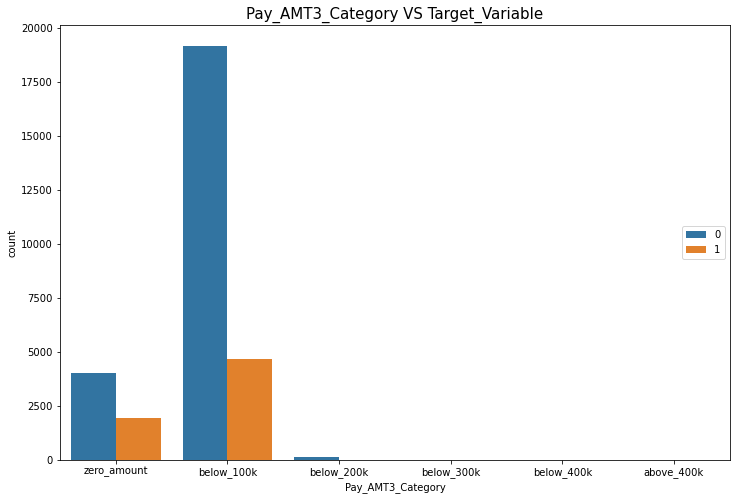

In [195]:
plt.figure(figsize=(12,8))
sns.countplot(x='Pay_AMT3_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Pay_AMT3_Category VS Target_Variable', fontsize = 15)
plt.show()

In [196]:
pd.DataFrame(df.groupby('Pay_AMT3_Category')['default payment next month'].value_counts())

default payment next month
Pay_AMT3_Category default payment next month                            
zero_amount       0                                                 4035
                  1                                                 1931
below_100k        0                                                19167
                  1                                                 4681
below_200k        0                                                  118
                  1                                                   17
below_300k        0                                                   18
                  1                                                    4
below_400k        0                                                   10
                  1                                                    1
above_400k        0                                                    2

In [197]:
pd.DataFrame(df.groupby('Pay_AMT3_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Pay_AMT3_Category default payment next month                            
zero_amount       0                                            67.633255
                  1                                            32.366745
below_100k        0                                            80.371520
                  1                                            19.628480
below_200k        0                                            87.407407
                  1                                            12.592593
below_300k        0                                            81.818182
                  1                                            18.181818
below_400k        0                                            90.909091
                  1                                             9.090909
above_400k        0                                           100.000000

In [ ]:
#Amount of previous payment in the month of July with below_100k recorded more defaults in credit with 4681 cases 
#followed by no payment in the previous month with 1931 cases

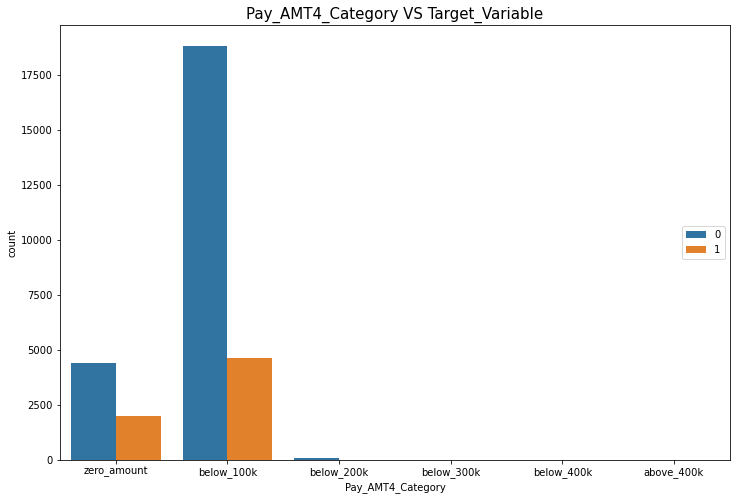

In [198]:
plt.figure(figsize=(12,8))
sns.countplot(x='Pay_AMT4_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Pay_AMT4_Category VS Target_Variable', fontsize = 15)
plt.show()

In [199]:
pd.DataFrame(df.groupby('Pay_AMT4_Category')['default payment next month'].value_counts())

default payment next month
Pay_AMT4_Category default payment next month                            
zero_amount       0                                                 4414
                  1                                                 1993
below_100k        0                                                18807
                  1                                                 4626
below_200k        0                                                  103
                  1                                                   12
below_300k        0                                                   21
                  1                                                    2
below_400k        0                                                    4
above_400k        0                                                    1
                  1                                                    1

In [200]:
pd.DataFrame(df.groupby('Pay_AMT4_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Pay_AMT4_Category default payment next month                            
zero_amount       0                                            68.893398
                  1                                            31.106602
below_100k        0                                            80.258610
                  1                                            19.741390
below_200k        0                                            89.565217
                  1                                            10.434783
below_300k        0                                            91.304348
                  1                                             8.695652
below_400k        0                                           100.000000
above_400k        0                                            50.000000
                  1                                            50.000000

In [ ]:
#Amount of previous payment in the month of June with below_100k recorded more defaults in credit with 4626 cases 
#followed by no payment in the previous month with 1993 cases

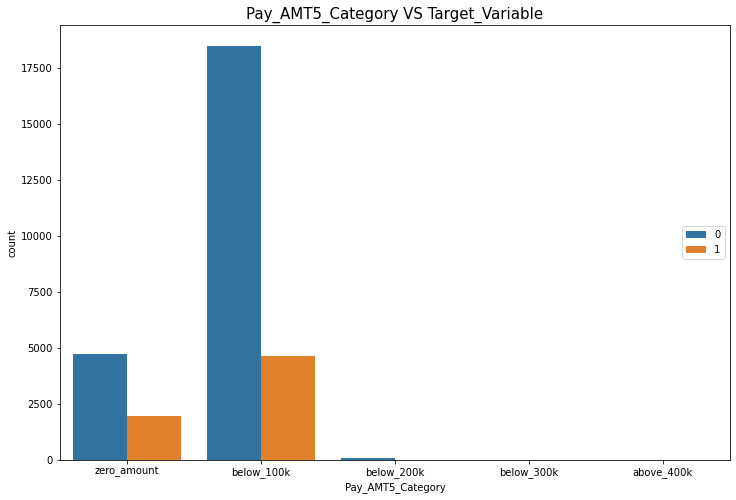

In [201]:
plt.figure(figsize=(12,8))
sns.countplot(x='Pay_AMT5_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Pay_AMT5_Category VS Target_Variable', fontsize = 15)
plt.show()

In [202]:
pd.DataFrame(df.groupby('Pay_AMT5_Category')['default payment next month'].value_counts())

default payment next month
Pay_AMT5_Category default payment next month                            
zero_amount       0                                                 4732
                  1                                                 1969
below_100k        0                                                18488
                  1                                                 4645
below_200k        0                                                  107
                  1                                                   16
below_300k        0                                                   17
                  1                                                    2
above_400k        0                                                    6
                  1                                                    2

In [203]:
pd.DataFrame(df.groupby('Pay_AMT5_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Pay_AMT5_Category default payment next month                            
zero_amount       0                                            70.616326
                  1                                            29.383674
below_100k        0                                            79.920460
                  1                                            20.079540
below_200k        0                                            86.991870
                  1                                            13.008130
below_300k        0                                            89.473684
                  1                                            10.526316
above_400k        0                                            75.000000
                  1                                            25.000000

In [ ]:
#Amount of previous payment in May with below_100k recorded more defaults in credit with 4645 cases 
#followed by no payment in the previous month with 1969 cases

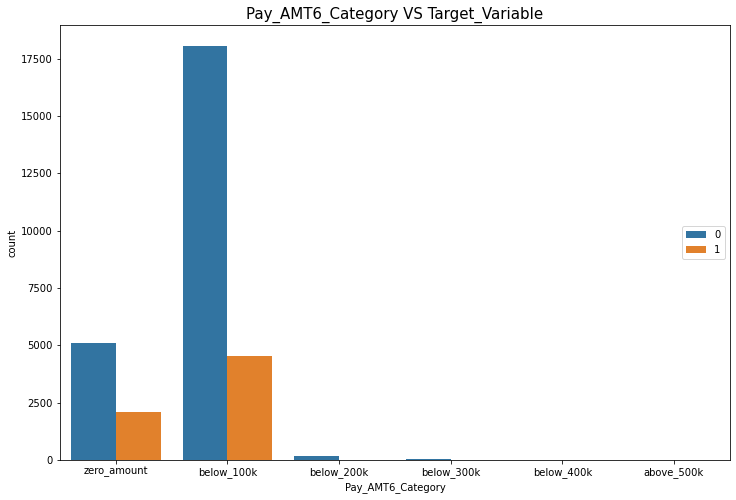

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(x='Pay_AMT6_Category', hue='default payment next month', data=df)
plt.legend(loc='right')
plt.title('Pay_AMT6_Category VS Target_Variable', fontsize = 15)
plt.show()

In [205]:
pd.DataFrame(df.groupby('Pay_AMT6_Category')['default payment next month'].value_counts())

default payment next month
Pay_AMT6_Category default payment next month                            
zero_amount       0                                                 5094
                  1                                                 2078
below_100k        0                                                18061
                  1                                                 4530
below_200k        0                                                  158
                  1                                                   20
below_300k        0                                                   30
                  1                                                    6
below_400k        0                                                    4
above_500k        0                                                    3

In [206]:
pd.DataFrame(df.groupby('Pay_AMT6_Category')['default payment next month'].value_counts(normalize=True)*100)

default payment next month
Pay_AMT6_Category default payment next month                            
zero_amount       0                                            71.026213
                  1                                            28.973787
below_100k        0                                            79.947767
                  1                                            20.052233
below_200k        0                                            88.764045
                  1                                            11.235955
below_300k        0                                            83.333333
                  1                                            16.666667
below_400k        0                                           100.000000
above_500k        0                                           100.000000

In [ ]:
#Amount of previous payment in April with below_100k recorded more defaults in credit with 4530 cases followed by no payment in the previous month with 2078 cases

# Multivariate Analysis

In [207]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Age_levels', 'Limit_Bal_Class',
       'Bill_AMT1_Category', 'Bill_AMT2_Category', 'Bill_AMT3_Category',
       'Bill_AMT4_Category', 'Bill_AMT5_Category', 'Bill_AMT6_Category',
       'Pay_AMT1_Category', 'Pay_AMT2_Category', 'Pay_AMT3_Category',
       'Pay_AMT4_Category', 'Pay_AMT5_Category', 'Pay_AMT6_Category'],
      dtype='object')

In [208]:
pd.DataFrame(df.groupby(['SEX','EDUCATION'])['default payment next month'].value_counts())

default payment next month
SEX EDUCATION default payment next month                            
1   0         0                                                    8
    1         0                                                 3446
              1                                                  904
    2         0                                                 3964
              1                                                 1408
    3         0                                                 1444
              1                                                  545
    4         0                                                   38
              1                                                    4
    5         0                                                   89
              1                                                    6
    6         0                                                   21
              1                                                    4
2   0         0                                                    6
    1         0                                                 5094
              1                                                 1130
    2         0                                                 6732
              1                                                 1922
    3         0                                                 2235
              1                                                  692
    4         0                                                   78
              1                                                    3
    5         0                                                  173
              1                                                   12
    6         0                                                   22
              1                                                    4

In [ ]:
#Males with education level of 2 which is university recorded defaults in the male gender 1408 cases /
#likewise males with education level of 1 graduate school recorded 904 cases
#Females with education level as university was the most of defaults in credit with 1922 recorded cases /
#also with females with post graduate studies 1130 cases
#    Calculation:
#       Males with university education = 1408
#       Males with post graduate education = 904
#        Females with university education = 1922
#        Females with post graduate education = 1130
#        Number of default= 6634
#        Sum of defaults with these two profiles = 5364
#        % reduction in default with these profile = (5364/6634)*100 = 80.86%

#RECOMMENDATION: 
#New customers with such profile in males and females can be denied credit as with this 80.86% of default can be reduced.

In [209]:
A= pd.DataFrame(df.groupby(['MARRIAGE','Age_levels'])['default payment next month'].value_counts())
A.iloc[:35,:]

default payment next month
MARRIAGE Age_levels default payment next month                            
0        below_25   0                                                    3
         below_30   0                                                    7
                    1                                                    2
         below_35   0                                                   10
         below_40   0                                                   12
         below_45   0                                                    6
                    1                                                    3
         below_50   0                                                    6
         below_55   0                                                    4
         below_60   0                                                    1
1        below_25   0                                                  305
                    1                                                  135
         below_30   0                                                 1087
                    1                                                  353
         below_35   0                                                 1993
                    1                                                  544
         below_40   0                                                 2486
                    1                                                  694
         below_45   0                                                 2026
                    1                                                  575
         below_50   0                                                 1309
                    1                                                  450
         below_55   0                                                  761
                    1                                                  271
         below_60   0                                                  314
                    1                                                  123
         below_65   0                                                  112
                    1                                                   39
         below_70   0                                                   43
                    1                                                   16
         below_75   0                                                   10
                    1                                                    5
2        below_25   0                                                 2522
                    1                                                  891
         below_30   0                                                 4581

In [210]:
A.iloc[35:,:]

default payment next month
MARRIAGE Age_levels default payment next month                            
2        below_30   1                                                 1078
         below_35   0                                                 2644
                    1                                                  573
         below_40   0                                                 1312
                    1                                                  360
         below_45   0                                                  723
                    1                                                  206
         below_50   0                                                  439
                    1                                                  132
         below_55   0                                                  276
                    1                                                   65
         below_60   0                                                   90
                    1                                                   23
         below_65   0                                                   20
                    1                                                   10
         below_70   0                                                   10
                    1                                                    2
3        below_25   0                                                    9
                    1                                                    6
         below_30   0                                                   23
                    1                                                    6
         below_35   0                                                   22
                    1                                                    7
         below_40   0                                                   41
                    1                                                    9
         below_45   0                                                   50
                    1                                                   14
         below_50   0                                                   42
                    1                                                   19
         below_55   0                                                   31
                    1                                                   17
         below_60   0                                                   16
                    1                                                    5
         below_65   0                                                    4
                    1                                                    1

In [ ]:
#Married customers between the ages of 21 and 49 recorded the most cases with default 
#with age 36-40 the most critical in this category recording 694 cases
#Singles between the ages of 21 and 39 recorded more default cases with age 26-30 the most critical having 1078 cases
#Calculation:
# Sum of ages between 21 and 49 for married = 135 + 353 + 544 + 694 + 575 = 2301
# Sum of ages between 21 and 39 for singles = 891 + 1078 + 573 = 2542
# Sum of both profiles = 2301 + 2542 = 4834
# Number of defaults = 6634
# % reduction by this profile = (4834/6634)*100 = 73%

#RECOMMENDATION: 

#The bank can reduce or stop issuance of credit to customers with such profile this will lead to a drop in default 
#with about 73%

In [211]:
B= pd.DataFrame(df.groupby(['MARRIAGE','EDUCATION'])['default payment next month'].value_counts())
B.iloc[:35,:]

default payment next month
MARRIAGE EDUCATION default payment next month                            
0        1         0                                                    4
         2         0                                                    5
                   1                                                    1
         3         0                                                   40
                   1                                                    4
1        0         0                                                    4
         1         0                                                 2950
                   1                                                  768
         2         0                                                 5173
                   1                                                 1666
         3         0                                                 2106
                   1                                                  754
         4         0                                                   49
                   1                                                    3
         5         0                                                  141
                   1                                                    9
         6         0                                                   23
                   1                                                    5
2        0         0                                                   10
         1         0                                                 5550
                   1                                                 1253
         2         0                                                 5400
                   1                                                 1619
         3         0                                                 1457
                   1                                                  452
         4         0                                                   64
                   1                                                    4
         5         0                                                  118
                   1                                                    9
         6         0                                                   18
                   1                                                    3
3        1         0                                                   36
                   1                                                   13
         2         0                                                  118
                   1                                                   44

In [ ]:
#Married with education level of university recorded 1666 cases was the most critical 
#while singles with university level recorded 1619 cases also single with post graduate recorded a high number of cases 
# with 1253
#Calculation:
# Married with university education = 1666
# Single with university education = 1619
# Single with post graduate education = 1253
# Sum with these profiles = 1666 + 1619 + 1253 = 4538
# Sum of defaults = 6634
# % reduction by these profile = (4538/6634)*100 = 68.41%

#RECOMMENDATION: 

#We can be more critical with customers seeking credit with such profile as this will lead to 
# a reduction by 68.41% of defaults.

In [237]:
B= pd.DataFrame(df.groupby(['SEX','Age_levels'])['default payment next month'].value_counts())
B.iloc[:,:]

default payment next month
SEX Age_levels default payment next month                            
1   below_25   0                                                  824
               1                                                  341
    below_30   0                                                 2104
               1                                                  572
    below_35   0                                                 1806
               1                                                  501
    below_40   0                                                 1542
               1                                                  510
    below_45   0                                                 1154
               1                                                  372
    below_50   0                                                  783
               1                                                  276
    below_55   0                                                  462
               1                                                  195
    below_60   0                                                  224
               1                                                   66
    below_65   0                                                   78
               1                                                   25
    below_70   0                                                   27
               1                                                   10
    below_75   0                                                    6
               1                                                    3
2   below_25   0                                                 2015
               1                                                  691
    below_30   0                                                 3594
               1                                                  867
    below_35   0                                                 2863
               1                                                  623
    below_40   0                                                 2309
               1                                                  553
    below_45   0                                                 1651
               1                                                  426
    below_50   0                                                 1013
               1                                                  325
    below_55   0                                                  610
               1                                                  158
    below_60   0                                                  197
               1                                                   85
    below_65   0                                                   58
               1                                                   25
    below_70   0                                                   26
               1                                                    8
    below_75   0                                                    4
               1                                                    2

In [ ]:
#Males between the ages of 26-30 was critical recording about 572 cases
#while males between 31-35 recorded 501 cases and those between 36-40 recorded 510 cases
#Females with ages between 26-30 was the most critical for females with 867 cases recorded
#While female between 21-25 recorded 691 cases and those between 31-35 623 cases
#Calculations:
#Sum of males in these categories = 572 + 501 + 510 = 1583
#Sum of females in these categories = 867 + 691 + 623 = 2181
#Sum of profiles = 1583 + 2181 = 3764
#Number of defaults = 6634
#% reduction by this profile = (3764/6634)*100 = 56.74%

#RECOMMENDATION:

#Not approving credit for new customers within these ages for both male and female can reduce our default by 56.74%

In [239]:
pd.DataFrame(df.groupby(['SEX','MARRIAGE'])['default payment next month'].value_counts())

default payment next month
SEX MARRIAGE default payment next month                            
1   0        0                                                   12
             1                                                    2
    1        0                                                 3841
             1                                                 1345
    2        0                                                 5066
             1                                                 1484
    3        0                                                   91
             1                                                   40
2   0        0                                                   37
             1                                                    3
    1        0                                                 6605
             1                                                 1860
    2        0                                                 7551
             1                                                 1856
    3        0                                                  147
             1                                                   44

In [246]:
C= pd.DataFrame(df.groupby(['SEX','MARRIAGE','Age_levels'])['default payment next month'].value_counts())
C.iloc[:40,:]

default payment next month
SEX MARRIAGE Age_levels default payment next month                            
1   0        below_30   0                                                    2
                        1                                                    2
             below_35   0                                                    1
             below_40   0                                                    5
             below_50   0                                                    3
             below_55   0                                                    1
    1        below_25   0                                                   41
                        1                                                   21
             below_30   0                                                  262
                        1                                                   99
             below_35   0                                                  623
                        1                                                  196
             below_40   0                                                  931
                        1                                                  316
             below_45   0                                                  803
                        1                                                  263
             below_50   0                                                  587
                        1                                                  204
             below_55   0                                                  343
                        1                                                  154
             below_60   0                                                  164
                        1                                                   58
             below_65   0                                                   62
                        1                                                   22
             below_70   0                                                   19
                        1                                                    9
             below_75   0                                                    6
                        1                                                    3
    2        below_25   0                                                  780
                        1                                                  317
             below_30   0                                                 1833
                        1                                                  470
             below_35   0                                                 1174
                        1                                                  302
             below_40   0                                                  589
                        1                                                  190
             below_45   0                                                  330
                        1                                                  102
             below_50   0                                                  180
                        1                                                   58

In [247]:
C.iloc[40:80,:]

default payment next month
SEX MARRIAGE Age_levels default payment next month                            
1   2        below_55   0                                                  107
                        1                                                   34
             below_60   0                                                   51
                        1                                                    7
             below_65   0                                                   14
                        1                                                    3
             below_70   0                                                    8
                        1                                                    1
    3        below_25   0                                                    3
                        1                                                    3
             below_30   0                                                    7
                        1                                                    1
             below_35   0                                                    8
                        1                                                    3
             below_40   0                                                   17
                        1                                                    4
             below_45   0                                                   21
                        1                                                    7
             below_50   1                                                   14
                        0                                                   13
             below_55   0                                                   11
                        1                                                    7
             below_60   0                                                    9
                        1                                                    1
             below_65   0                                                    2
2   0        below_25   0                                                    3
             below_30   0                                                    5
             below_35   0                                                    9
             below_40   0                                                    7
             below_45   0                                                    6
                        1                                                    3
             below_50   0                                                    3
             below_55   0                                                    3
             below_60   0                                                    1
    1        below_25   0                                                  264
                        1                                                  114
             below_30   0                                                  825
                        1                                                  254
             below_35   0                                                 1370
                        1                                                  348

In [248]:
C.iloc[80:,:]

default payment next month
SEX MARRIAGE Age_levels default payment next month                            
2   1        below_40   0                                                 1555
                        1                                                  378
             below_45   0                                                 1223
                        1                                                  312
             below_50   0                                                  722
                        1                                                  246
             below_55   0                                                  418
                        1                                                  117
             below_60   0                                                  150
                        1                                                   65
             below_65   0                                                   50
                        1                                                   17
             below_70   0                                                   24
                        1                                                    7
             below_75   0                                                    4
                        1                                                    2
    2        below_25   0                                                 1742
                        1                                                  574
             below_30   0                                                 2748
                        1                                                  608
             below_35   0                                                 1470
                        1                                                  271
             below_40   0                                                  723
                        1                                                  170
             below_45   0                                                  393
                        1                                                  104
             below_50   0                                                  259
                        1                                                   74
             below_55   0                                                  169
                        1                                                   31
             below_60   0                                                   39
                        1                                                   16
             below_65   1                                                    7
                        0                                                    6
             below_70   0                                                    2
                        1                                                    1
    3        below_25   0                                                    6
                        1                                                    3
             below_30   0                                                   16
                        1                                                    5
             below_35   0                                                   14
                        1                                                    4
             below_40   0                                                   24
                        1                                                    5
             below_45   0                                                   29
                        1                                                    7
             below_50   0                                                   29
                        1                                                    5
             below_55   0                                                   20
                       

In [ ]:
#Married males between the ages of 40-49 recorded a sum 579 cases 
#while single males between the ages of 21-39 recorded 1089
#Married females between the ages of 35-49 recorded 1038 cases
#While single females between the age of 21-34 recorded 1182
#Narrowing the defaults cases by analysing more features closely as done above using sex,marriage and age 

#RECOMMENDATION:

#we can see that single males and single females between the ages of 21-39 and 21-34 respectively
#recorded higher cases of default this can serve as a profile to look out for when issueing credit

In [249]:
D= pd.DataFrame(df.groupby(['SEX','MARRIAGE','EDUCATION'])['default payment next month'].value_counts())
D.iloc[:40,:]

default payment next month
SEX MARRIAGE EDUCATION default payment next month                            
1   0        1         0                                                    1
             2         0                                                    1
             3         0                                                   10
                       1                                                    2
    1        0         0                                                    2
             1         0                                                 1300
                       1                                                  389
             2         0                                                 1725
                       1                                                  643
             3         0                                                  744
                       1                                                  303
             4         0                                                   16
                       1                                                    2
             5         0                                                   44
                       1                                                    4
             6         0                                                   10
                       1                                                    4
    2        0         0                                                    6
             1         0                                                 2125
                       1                                                  505
             2         0                                                 2194
                       1                                                  746
             3         0                                                  665
                       1                                                  229
             4         0                                                   21
                       1                                                    2
             5         0                                                   44
                       1                                                    2
             6         0                                                   11
    3        1         0                                                   20
                       1                                                   10
             2         0                                                   44
                       1                                                   19
             3         0                                                   25
                       1                                                   11
             4         0                                                    1
             5         0                                                    1
2   0        1         0                                                    3
             2         0                                                    4
                       1                                                    1

In [250]:
D.iloc[40:,:]

default payment next month
SEX MARRIAGE EDUCATION default payment next month                            
2   0        3         0                                                   30
                       1                                                    2
    1        0         0                                                    2
             1         0                                                 1650
                       1                                                  379
             2         0                                                 3448
                       1                                                 1023
             3         0                                                 1362
                       1                                                  451
             4         0                                                   33
                       1                                                    1
             5         0                                                   97
                       1                                                    5
             6         0                                                   13
                       1                                                    1
    2        0         0                                                    4
             1         0                                                 3425
                       1                                                  748
             2         0                                                 3206
                       1                                                  873
             3         0                                                  792
                       1                                                  223
             4         0                                                   43
                       1                                                    2
             5         0                                                   74
                       1                                                    7
             6         0                                                    7
                       1                                                    3
    3        1         0                                                   16
                       1                                                    3
             2         0                                                   74
                       1                                                   25
             3         0                                                   51
                       1                                                   16
             4         0                                                    2
             5         0                                                    2
             6         0                                                    2

In [ ]:
#Married males with university education recorded 643 cases and those with graduate studies 389  of credit default
#while single males with university education recorded 746 while those with graduate studies recorded 505 of credit default
#Married females with university education recorded 1023 cases and those with high school 451  of credit default
#While single females with university education recorded 873 cases and those with graduate studies 748  of credit default
#Narrowing the defaults cases by analysing more features closely as done above using sex,marriage and education
#Calculation:
#Married males with university=643
#Married males with graduate studies= 389
#single males with university = 746
#single males with graduate studies = 505
#Married females with university = 1023
#Married females with high school = 451
#single females with university = 873
#single females with graduate studies = 748
#sum = 643 + 389 + 746 + 505 + 1023 + 451 + 873 + 748 = 5378
#number of credit default = 6634
#% reduction with these profiles = (5378/6634)*100 = 81.07%

#we can track 5378 cases of credit default which can lead to 81.07% decline in credit default

#Using these profiles above we can reduce the cases of default in issueing credit to new customers

In [218]:
pd.DataFrame(df.groupby(['Bill_AMT1_Category','Pay_AMT1_Category'])['default payment next month'].value_counts())

default payment next month
Bill_AMT1_Category Pay_AMT1_Category default payment next month                            
below_0            zero_amount       0                                                 1256
                                     1                                                  497
                   below_100k        0                                                  688
                                     1                                                  145
                   below_200k        0                                                    4
                                     1                                                    1
                   below_300k        0                                                    5
below_100k         zero_amount       0                                                 1967
                                     1                                                 1248
                   below_100k        0                                                15399
                                     1                                                 3782
                   below_200k        0                                                   67
                                     1                                                    4
                   below_300k        0                                                   15
                                     1                                                    1
                   below_400k        0                                                    3
                   above_400k        0                                                    1
below_200k         zero_amount       0                                                  102
                                     1                                                   92
                   below_100k        0                                                 2607
                                     1                                                  550
                   below_200k        0                                                   20
                                     1                                                    5
                   below_300k        0                                                    3
                                     1                                                    1
                   below_400k        0                                                    1
below_300k         zero_amount       1                                                   31
                                     0                                                   23
                   below_100k        0                                                  813
                                     1                                                  158
                   below_200k        0                                                    5
                   below_300k        0                                                    2
below_400k         zero_amount       0                                                    9
                                     1                                                    8
                   below_100k        0                                                  230
                                     1                                                   64
                   below_200k        0                                                    1
                   below_300k        0                                                    1
                   below_400k        0                                                    1
                   above_400k        0                                                    1
below_500k         zero_amount       1                                                    8
                                     0                                                    2
                 

In [219]:
pd.DataFrame(df.groupby(['Bill_AMT2_Category','Pay_AMT2_Category'])['default payment next month'].value_counts())

default payment next month
Bill_AMT2_Category Pay_AMT2_Category default payment next month                            
below_0            zero_amount       0                                                 1620
                                     1                                                  570
                   below_100k        0                                                  781
                                     1                                                  170
                   below_200k        0                                                   20
                                     1                                                    3
                   below_300k        0                                                    5
                   below_400k        0                                                    1
                                     1                                                    1
                   above_1.1M        0                                                    1
below_100k         zero_amount       0                                                 1842
                                     1                                                 1112
                   below_100k        0                                                15231
                                     1                                                 3851
                   below_200k        0                                                   86
                                     1                                                    3
                   below_300k        0                                                   18
                                     1                                                    2
                   below_400k        0                                                    7
                                     1                                                    1
                   below_500k        0                                                    1
below_200k         zero_amount       0                                                  106
                                     1                                                   77
                   below_100k        0                                                 2515
                                     1                                                  549
                   below_200k        0                                                   16
                                     1                                                    3
                   below_300k        0                                                    3
                   below_400k        0                                                    1
                                     1                                                    1
below_300k         zero_amount       0                                                   23
                                     1                                                   22
                   below_100k        0                                                  733
                                     1                                                  154
                   below_200k        0                                                    8
                                     1                                                    1
                   below_300k        0                                                    2
                   below_400k        0                                                    1
                   below_600k        0                                                    1
below_400k         zero_amount       1                                                    8
                                     0                                                    4
                   below_100k        0                                                  219
                 

In [220]:
pd.DataFrame(df.groupby(['Bill_AMT3_Category','Pay_AMT3_Category'])['default payment next month'].value_counts())

default payment next month
Bill_AMT3_Category Pay_AMT3_Category default payment next month                            
below_0            zero_amount       0                                                 1905
                                     1                                                  666
                   below_100k        0                                                  777
                                     1                                                  149
                   below_200k        0                                                   15
                                     1                                                    2
                   below_300k        0                                                    6
                                     1                                                    1
                   below_400k        0                                                    1
                                     1                                                    1
below_100k         zero_amount       0                                                 2001
                                     1                                                 1161
                   below_100k        0                                                15041
                                     1                                                 3777
                   below_200k        0                                                   83
                                     1                                                   12
                   below_300k        0                                                    8
                                     1                                                    1
                   below_400k        0                                                    5
                   above_400k        0                                                    2
below_200k         zero_amount       0                                                  101
                                     1                                                   78
                   below_100k        0                                                 2402
                                     1                                                  519
                   below_200k        0                                                   15
                                     1                                                    1
                   below_300k        0                                                    3
                                     1                                                    1
                   below_400k        0                                                    1
below_300k         zero_amount       0                                                   25
                                     1                                                   19
                   below_100k        0                                                  657
                                     1                                                  142
                   below_200k        0                                                    3
                                     1                                                    1
                   below_300k        0                                                    1
                                     1                                                    1
                   below_400k        0                                                    1
below_400k         zero_amount       1                                                    5
                                     0                                                    2
                   below_100k        0                                                  200
                                     1                                                   65
                 

In [221]:
pd.DataFrame(df.groupby(['Bill_AMT4_Category','Pay_AMT4_Category'])['default payment next month'].value_counts())

default payment next month
Bill_AMT4_Category Pay_AMT4_Category default payment next month                            
below_0            zero_amount       0                                                 2065
                                     1                                                  730
                   below_100k        0                                                  884
                                     1                                                  166
                   below_200k        0                                                   13
                                     1                                                    3
                   below_300k        0                                                    4
                   below_400k        0                                                    3
below_100k         zero_amount       0                                                 2249
                                     1                                                 1175
                   below_100k        0                                                14875
                                     1                                                 3766
                   below_200k        0                                                   76
                                     1                                                    5
                   below_300k        0                                                   11
                                     1                                                    1
                   below_400k        0                                                    1
below_200k         zero_amount       0                                                   84
                                     1                                                   71
                   below_100k        0                                                 2277
                                     1                                                  489
                   below_200k        0                                                   10
                                     1                                                    3
                   below_300k        0                                                    3
                                     1                                                    1
below_300k         zero_amount       1                                                   12
                                     0                                                   11
                   below_100k        0                                                  549
                                     1                                                  131
                   below_200k        0                                                    1
                   below_300k        0                                                    2
below_400k         zero_amount       1                                                    4
                                     0                                                    3
                   below_100k        0                                                  158
                                     1                                                   52
                   below_200k        0                                                    2
                                     1                                                    1
                   below_300k        0                                                    1
                   above_400k        0                                                    1
below_500k         zero_amount       0                                                    1
                                     1                                                    1
                   below_100k        0                                                   55
                 

In [222]:
pd.DataFrame(df.groupby(['Bill_AMT5_Category','Pay_AMT5_Category'])['default payment next month'].value_counts())

default payment next month
Bill_AMT5_Category Pay_AMT5_Category default payment next month                            
below_0            zero_amount       0                                                 2340
                                     1                                                  816
                   below_100k        0                                                  806
                                     1                                                  175
                   below_200k        0                                                   14
                                     1                                                    3
                   below_300k        0                                                    3
                   above_400k        0                                                    1
                                     1                                                    1
below_100k         zero_amount       0                                                 2285
                                     1                                                 1079
                   below_100k        0                                                14919
                                     1                                                 3802
                   below_200k        0                                                   66
                                     1                                                    7
                   below_300k        0                                                    8
                   above_400k        0                                                    4
                                     1                                                    1
below_200k         zero_amount       0                                                   86
                                     1                                                   56
                   below_100k        0                                                 2120
                                     1                                                  492
                   below_200k        0                                                   19
                                     1                                                    6
                   below_300k        0                                                    4
                   above_400k        0                                                    1
below_300k         zero_amount       0                                                   15
                                     1                                                   10
                   below_100k        0                                                  471
                                     1                                                  119
                   below_200k        0                                                    4
                   below_300k        0                                                    2
                                     1                                                    1
below_400k         zero_amount       1                                                    6
                                     0                                                    4
                   below_100k        0                                                  129
                                     1                                                   39
                   below_200k        0                                                    3
                   below_300k        1                                                    1
below_500k         zero_amount       0                                                    2
                                     1                                                    1
                   below_100k        0                                                   36
                 

In [223]:
pd.DataFrame(df.groupby(['Bill_AMT6_Category','Pay_AMT6_Category'])['default payment next month'].value_counts())

default payment next month
Bill_AMT6_Category Pay_AMT6_Category default payment next month                            
below_0            zero_amount       0                                                 2781
                                     1                                                  922
                   below_100k        0                                                  806
                                     1                                                  162
                   below_200k        0                                                   27
                                     1                                                    1
                   below_300k        0                                                    7
below_100k         zero_amount       0                                                 2207
                                     1                                                 1070
                   below_100k        0                                                14589
                                     1                                                 3740
                   below_200k        0                                                  103
                                     1                                                   12
                   below_300k        0                                                   17
                                     1                                                    3
                   below_400k        0                                                    3
                   above_500k        0                                                    1
below_200k         zero_amount       0                                                   81
                                     1                                                   72
                   below_100k        0                                                 2072
                                     1                                                  462
                   below_200k        0                                                   21
                                     1                                                    5
                   below_300k        0                                                    3
                                     1                                                    1
                   below_400k        0                                                    1
                   above_500k        0                                                    1
below_300k         zero_amount       0                                                   20
                                     1                                                   11
                   below_100k        0                                                  440
                                     1                                                  113
                   below_200k        0                                                    4
                                     1                                                    1
                   below_300k        1                                                    2
                                     0                                                    1
below_400k         zero_amount       0                                                    4
                                     1                                                    3
                   below_100k        0                                                  118
                                     1                                                   36
                   below_200k        0                                                    1
                                     1                                                    1
                   below_300k        0                                                    1
below_500k       

In [ ]:
#Comparing bill amount from 1-6 with payment amount from 1-6, below_100k as bill amount and zero_amount and below_100k 
#as payment amount has acounted for the most default in credit

# SUMMARY OF PROFILLING AND RECOMMENDATIONS

In [ ]:
#Credit card users with below_100k and below_200k limit balance accounts for 78.67% of defaults 
#with below_100k been the most default with 3684 customers.
#As the limit balance increases the number of defaults decreases, 
#indicating that the higher the limit balance the lower the probability of the customer defaulting.

In [ ]:
#More default cases were recorded with the female gender with about 56.72% while male accounted for 43.28%

In [ ]:
#Education value of 2 which is university recorded more cases of default with 50.19% 
#followed by education 1 which is graduate school accounting for 30.66% 
#while education value 3 high school accounts for 18.65%

In [ ]:
#Singles accounts for a higher number of defaults with 3340 cases recorded closely followed by married with 3205 cases

In [ ]:
#More cases of default was recorded with customers between the ages of 21 and 45 with 4658 cases recorded accounting for 70.21%

In [ ]:
#As the bill amount statement increases the cases of defaults decreases

In [ ]:
#Males with education level of 2 which is university recorded defaults in the male gender 1408 cases 
#likewise males with education level of 1 graduate school recorded 904 cases
#Females with education level as university was the most of defaults in credit with 1922 recorded cases 
#also with females with graduate studies 1130 cases

#RECOMMENDATION:

#New customers with such profile in males and females can be denied credit as with this 
#80.86% of credit default can be reduced.

In [ ]:
#Married customers between the ages of 21 and 49 recorded the most cases with default 
#with age 36-40 the most critical in this category recording 694 cases
#Singles between the ages of 21 and 39 recorded more default cases with age 26-30 the most critical having 1078 cases

#RECOMMENDATION: 

#The bank can reduce or stop issuance of credit to customers with such profile this will lead to a drop in credit default 
#with about 73%

In [ ]:
#Married with education level of university recorded 1666 cases was the most critical 
#while singles with university level recorded 1619 cases also single with graduate recorded a high number of cases 
# with 1253

#RECOMMENDATION: 

#We can be more critical with customers seeking credit with such profile as this will lead to 
# a reduction by 68.41% of credit defaults.

In [ ]:
#Males between the ages of 26-30 was critical recording about 572 cases
#while males between 31-35 recorded 501 cases and those between 36-40 recorded 510 cases
#Females with ages between 26-30 was the most critical for females with 867 cases recorded
#While female between 21-25 recorded 691 cases and those between 31-35 623 cases

#RECOMMENDATION:

#Not approving credit for new customers within these ages for both male and female can reduce our credit default by 56.74%

In [ ]:
#Married males between the ages of 40-49 recorded a sum 579 cases 
#while single males between the ages of 21-39 recorded 1089
#Married females between the ages of 35-49 recorded 1038 cases
#While single females between the age of 21-34 recorded 1182
#Narrowing the defaults cases by analysing more features closely as done above using sex,marriage and age 

#RECOMMENDATION:

#we can see that single males and single females between the ages of 21-39 and 21-34 respectively
#recorded higher cases of credit default this can serve as a profile to look out for when issueing credit

In [ ]:
#Married males with university education recorded 643 cases and those with graduate studies 389  of credit default
#while single males with university education recorded 746 while those with graduate studies recorded 505 of credit default
#Married females with university education recorded 1023 cases and those with high school 451  of credit default
#While single females with university education recorded 873 cases and those with graduate studies 748  of credit default
#Narrowing the defaults cases by analysing more features closely as done above using sex,marriage and education
#we can track 5378 cases of credit default which can lead to 81.07% decline in credit default

#Using these profiles above we can reduce the cases of default in issueing credit to new customers

# DATA PREPROCESSING AND TRANSFORMATION

In [ ]:
#DROPPING CATEGORICAL FEATURES

In [252]:
df2 = df.drop(columns = ['Age_levels', 'Limit_Bal_Class',
       'Bill_AMT1_Category', 'Bill_AMT2_Category', 'Bill_AMT3_Category',
       'Bill_AMT4_Category', 'Bill_AMT5_Category', 'Bill_AMT6_Category',
       'Pay_AMT1_Category', 'Pay_AMT2_Category', 'Pay_AMT3_Category',
       'Pay_AMT4_Category', 'Pay_AMT5_Category', 'Pay_AMT6_Category'], axis=1)

In [254]:
predictors_df = df2.drop(columns ='default payment next month')
target_df = df2['default payment next month']

In [257]:
scaler = MinMaxScaler(feature_range=(-1,1))
rescaled_df = pd.DataFrame(scaler.fit_transform(predictors_df), columns= predictors_df.columns)

In [258]:
scaler_2 = Normalizer()
normalized_df = pd.DataFrame(scaler_2.fit_transform(rescaled_df), columns= rescaled_df.columns)

# SPLITTING DATASET

In [259]:
x_train, x_test, y_train, y_test = train_test_split(normalized_df,target_df, test_size=0.3, random_state=42)

# REMOVING IMBALANCE

In [260]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# MODEL BUILDING AND EVALUATION

In [265]:
clf = [ LogisticRegression(random_state=3,max_iter=10000), DecisionTreeClassifier(random_state=3), SVC (random_state=3),
       RandomForestClassifier(random_state=3) ]

In [271]:
for i in range(0, len(clf)):
        text_clf = Pipeline([('clf', clf[i])])
        print(text_clf)
        text_clf.fit(x_train_smote, y_train_smote)  
        predictions = text_clf.predict(x_test)
        
        print(metrics.confusion_matrix(y_test,predictions))
        print(metrics.classification_report(y_test,predictions))
        print('AUC Score is: ',round(roc_auc_score(y_test,predictions),3))
        print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),3))
        print('-------------------------------------------------------')

Pipeline(steps=[('clf', LogisticRegression(max_iter=10000, random_state=3))])
[[5096 1878]
 [ 739 1283]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      6974
           1       0.41      0.63      0.50      2022

    accuracy                           0.71      8996
   macro avg       0.64      0.68      0.65      8996
weighted avg       0.77      0.71      0.73      8996

AUC Score is:  0.683
F1_score:  0.728
-------------------------------------------------------
Pipeline(steps=[('clf', DecisionTreeClassifier(random_state=3))])
[[5206 1768]
 [1076  946]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      6974
           1       0.35      0.47      0.40      2022

    accuracy                           0.68      8996
   macro avg       0.59      0.61      0.59      8996
weighted avg       0.72      0.68      0.70      8996

AUC Score is:  0.607
F1_score:  0.699
----------------

In [232]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Age_levels', 'Limit_Bal_Class',
       'Bill_AMT1_Category', 'Bill_AMT2_Category', 'Bill_AMT3_Category',
       'Bill_AMT4_Category', 'Bill_AMT5_Category', 'Bill_AMT6_Category',
       'Pay_AMT1_Category', 'Pay_AMT2_Category', 'Pay_AMT3_Category',
       'Pay_AMT4_Category', 'Pay_AMT5_Category', 'Pay_AMT6_Category'],
      dtype='object')

In [233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,29984.0,15000.114494,8659.368393,1.0,7501.75,15000.5,22498.25,30000.0
LIMIT_BAL,29984.0,167335.234792,129510.800218,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,29984.0,1.603755,0.489125,1.0,1.00,2.0,2.00,2.0
EDUCATION,29984.0,1.853388,0.790361,0.0,1.00,2.0,2.00,6.0
MARRIAGE,29984.0,1.551861,0.521919,0.0,1.00,2.0,2.00,3.0
AGE,29984.0,35.485025,9.218897,21.0,28.00,34.0,41.00,79.0
PAY_0,29984.0,-0.016642,1.123865,-2.0,-1.00,0.0,0.00,8.0
PAY_2,29984.0,-0.133471,1.197333,-2.0,-1.00,0.0,0.00,8.0
PAY_3,29984.0,-0.166055,1.197004,-2.0,-1.00,0.0,0.00,8.0
PAY_4,29984.0,-0.220484,1.169339,-2.0,-1.00,0.0,0.00,8.0


In [234]:
df.iloc[:,0:13].corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1
ID,1.000000,0.026312,0.018439,0.039369,-0.029239,0.018859,-0.030763,-0.011269,-0.018496,-0.002684,-0.022207,-0.020312,0.019657
LIMIT_BAL,0.026312,1.000000,0.024707,-0.218789,-0.108364,0.144896,-0.271698,-0.296650,-0.286559,-0.267846,-0.249848,-0.235579,0.284034
SEX,0.018439,0.024707,1.000000,0.014331,-0.031530,-0.090810,-0.057562,-0.070718,-0.065960,-0.060154,-0.055041,-0.043920,-0.033945
EDUCATION,0.039369,-0.218789,0.014331,1.000000,-0.143354,0.175069,0.105316,0.121460,0.113940,0.108687,0.097533,0.082254,0.024231
MARRIAGE,-0.029239,-0.108364,-0.031530,-0.143354,1.000000,-0.414371,0.020150,0.024260,0.032871,0.033137,0.035589,0.034359,-0.022961
AGE,0.018859,0.144896,-0.090810,0.175069,-0.414371,1.000000,-0.039424,-0.050257,-0.053167,-0.049742,-0.053893,-0.048910,0.055809
PAY_0,-0.030763,-0.271698,-0.057562,0.105316,0.020150,-0.039424,1.000000,0.672289,0.574315,0.538993,0.509506,0.474661,0.187459
PAY_2,-0.011269,-0.296650,-0.070718,0.121460,0.024260,-0.050257,0.672289,1.000000,0.766602,0.662086,0.622787,0.575485,0.235503
PAY_3,-0.018496,-0.286559,-0.065960,0.113940,0.032871,-0.053167,0.574315,0.766602,1.000000,0.777419,0.686831,0.632686,0.209246
PAY_4,-0.002684,-0.267846,-0.060154,0.108687,0.033137,-0.049742,0.538993,0.662086,0.777419,1.000000,0.819898,0.716522,0.203930


In [235]:
df.iloc[:,13:26].corr()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
BILL_AMT2,1.000000,0.939143,0.893802,0.861207,0.834129,0.291510,0.113671,0.134449,0.151530,0.165323,0.180938,-0.014178
BILL_AMT3,0.939143,1.000000,0.933952,0.894539,0.861592,0.254294,0.311459,0.126501,0.146782,0.163824,0.185054,-0.013405
BILL_AMT4,0.893802,0.933952,1.000000,0.941366,0.903400,0.243776,0.243473,0.299131,0.138307,0.160261,0.177152,-0.010100
BILL_AMT5,0.861207,0.894539,0.941366,1.000000,0.947577,0.224747,0.210334,0.241048,0.296700,0.142438,0.166060,-0.006565
BILL_AMT6,0.834129,0.861592,0.903400,0.947577,1.000000,0.205899,0.186283,0.217320,0.248853,0.303968,0.123188,-0.004592
PAY_AMT1,0.291510,0.254294,0.243776,0.224747,0.205899,1.000000,0.184104,0.183535,0.149877,0.150691,0.190821,-0.077010
PAY_AMT2,0.113671,0.311459,0.243473,0.210334,0.186283,0.184104,1.000000,0.171304,0.130990,0.137569,0.161002,-0.069388
PAY_AMT3,0.134449,0.126501,0.299131,0.241048,0.217320,0.183535,0.171304,1.000000,0.173236,0.172503,0.159652,-0.062618
PAY_AMT4,0.151530,0.146782,0.138307,0.296700,0.248853,0.149877,0.130990,0.173236,1.000000,0.155809,0.162931,-0.058516
PAY_AMT5,0.165323,0.163824,0.160261,0.142438,0.303968,0.150691,0.137569,0.172503,0.155809,1.000000,0.165481,-0.055685


<AxesSubplot:>

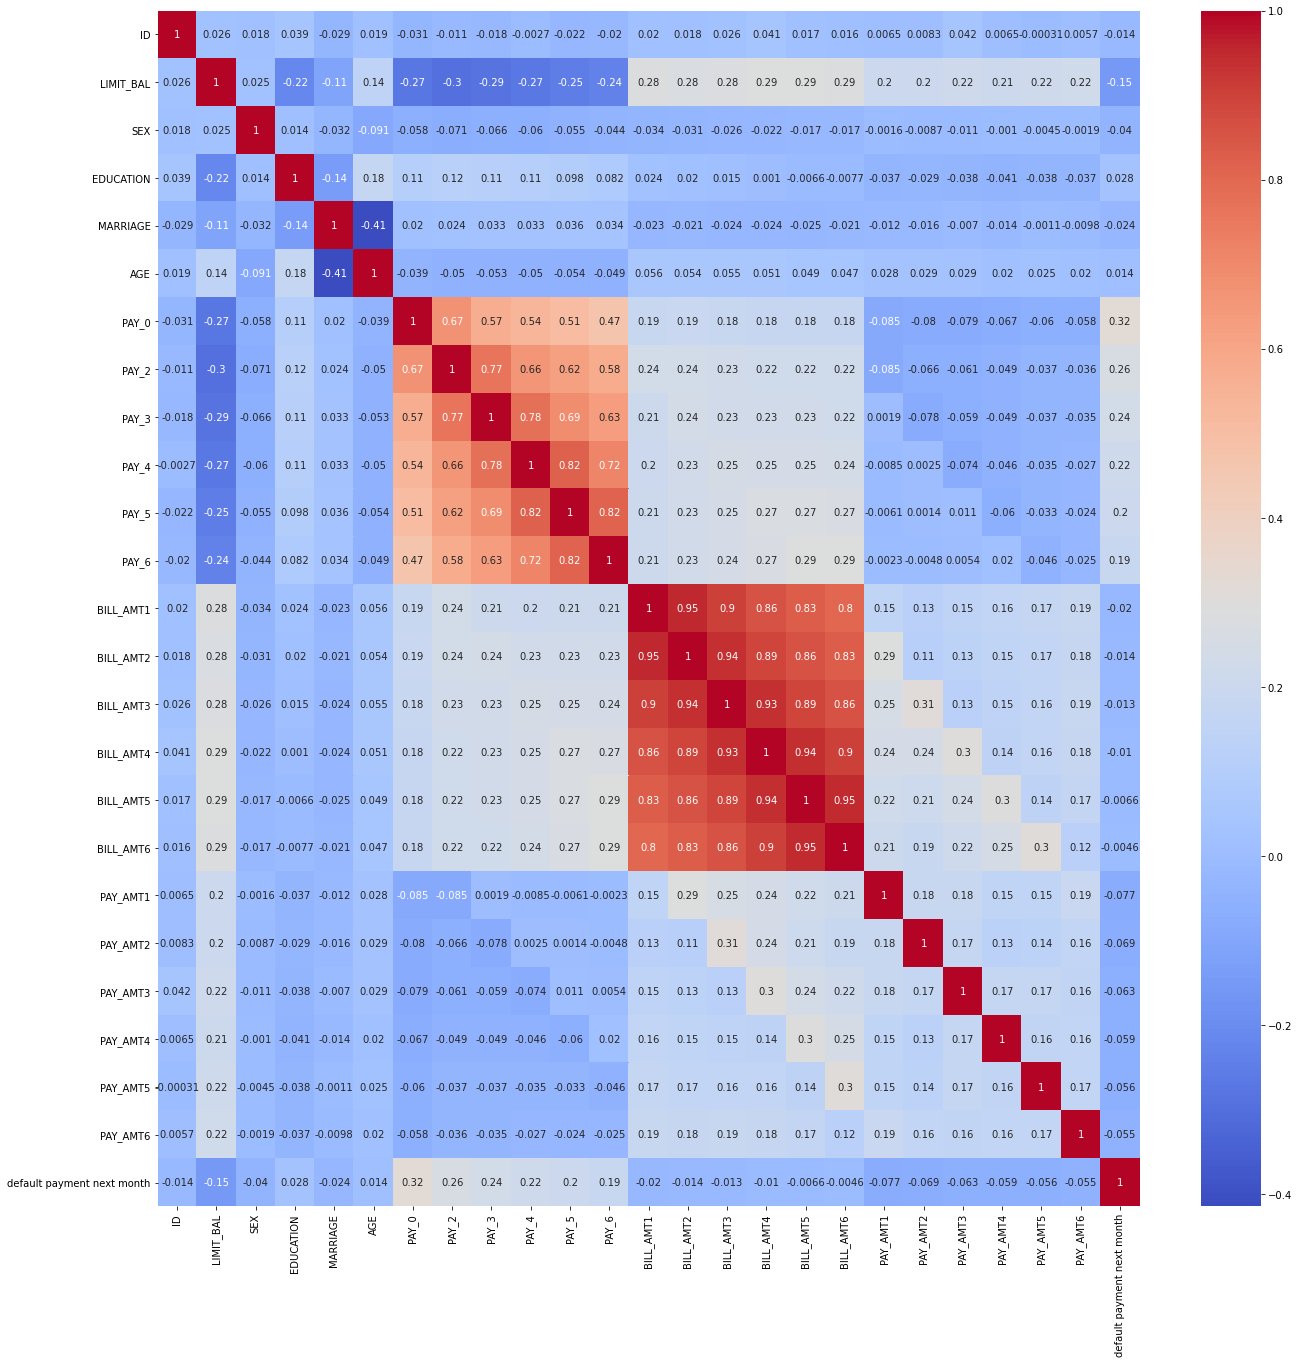

In [236]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)